# Install the SRPlasticity package within a virtual environment
We recommend that new and advanced users set up a separate virtual environment before installing the SRPlasticity package.

I. To create a virtual environment, run the following commands:

In [ ]:
!pip install virtualenv
!virtualenv srplasticity_env

created virtual environment CPython3.11.11.final.0-64 in 826ms
  creator CPython3Posix(dest=/content/srplasticity_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: contourpy==1.3.1, cycler==0.12.1, fonttools==4.55.3, joblib==1.4.2, kiwisolver==1.4.8, matplotlib==3.10.0, numpy==2.2.1, packaging==24.2, pandas==2.2.3, pillow==11.1.0, pip==24.3.1, pyparsing==3.2.1, python_dateutil==2.9.0.post0, pytz==2024.2, scikit_learn==1.6.1, scipy==1.15.1, seaborn==0.13.2, setuptools==75.6.0, six==1.17.0, spiffyplots==0.6.1, srplasticity==0.0.2, threadpoolctl==3.5.0, tzdata==2024.2, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


II. Enter one of the following two the following line to download or update the SRPlasticity repository (use the first command to install or the second set of commands to update):

In [ ]:
#if first time
!git clone https://github.com/nauralcodinglab/srplasticity

#if already installed
%cd /content/srplasticity
!git pull
%cd -

fatal: destination path 'srplasticity' already exists and is not an empty directory.
/content/srplasticity
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
Unpacking objects: 100% (7/7), 5.46 KiB | 1.82 MiB/s, done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
From https://github.com/nauralcodinglab/srplasticity
   b7500cc..df70499  master             -> origin/master
 * [new branch]      jgbeninger-patch-6 -> origin/jgbeninger-patch-6
 * [new branch]      jgbeninger-patch-7 -> origin/jgbeninger-patch-7
Updating b7500cc..df70499
Fast-forward
 .gitignore                               | 173 ++++++++++++++++
 build/lib/srplasticity/__init__.py       |  17 --
 build/lib/srplasticity/inference.py      | 525 ----------------------------------------------
 build/lib/srplasticity/models.py         |  22 --
 build/lib/srplasticity/srp.py            | 571 -------------------------------------

III. Install the packages listed in the “Key Resources Table” and “Materials and equipment setup” of the protocol as well as the SRPlasticity package:

In [ ]:
!source /content/srplasticity_env/bin/activate; pip install -e srplasticity

Obtaining file:///content/srplasticity
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for srplasticity (pyproject.toml) ... done
  Created wheel for srplasticity: filename=srplasticity-0.0.2-0.editable-py3-none-any.whl size=15521 sha256=6425492b1fa90ebe48701e2f7a4c4a5a5cac459c82b133d4b89e20b226ff30f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-kvlaf5pd/wheels/fa/3f/d2/8d21d63e0bc334e84811060a184594663cac19b79a3726d412
Successfully built srplasticity
  Attempting uninstall: srplasticity
    Found existing installation: srplasticity 0.0.2
    Uninstalling srplasticity-0.0.2:
      Successfully uninstalled srplasticity-0.0.2


IV. Run these lines to modify the Python module search path, ensuring that the modules and packages are found and can be imported.

In [ ]:
import sys
sys.path.insert(0, "/content/srplasticity_env/lib/python3.10/site-packages")
sys.path.insert(1, "/content/srplasticity")

**Note:** From this point on we adjust our step numbering to correspond to the nearest context specific equivalent steps from the Star Protocol document.

# Preprocessing synaptic responses
Responses are normalized to the average of all first responses.

**Note**: We assume post-synaptic response amplitudes have already been computed and the data do not require extensive cleaning. Depending on the dataset, additional preprocessing steps (e.g., removing outliers) may be needed. We direct the user to Beninger et al. (see protocol) for more extensive pre-processing methods.

10. Import the following packages:

In [ ]:
import pickle
from srplasticity.srp_extrafuncs import norm_responses

11. Import synaptic response amplitudes.

In [ ]:
with open('./srplasticity/data/star_protocol_example/norm_syn_example.p', 'rb') as file:
    target_dict = pickle.load(file)

# Printing the value of a protocol key, corresponding to a numpy array of multiple runs
print(target_dict["protocol_1"])

[[ 8.15268841e-01  2.81599438e-01  9.90741424e-01  9.27731905e-02
  -4.76535776e-02 -5.87997532e-01  5.52316547e-01  1.34263266e+00
   8.87363262e+00  2.40985648e+00  4.11305267e-01 -3.33344728e-02]
 [ 1.36775362e+00  8.13544472e-01 -1.22058608e+00 -1.56004059e-01
  -1.49990405e-01  1.41445948e+00 -1.68770168e+00  2.15286007e-02
   2.24073987e+00 -3.34183237e-01  1.73493160e+00 -1.07267866e+00]
 [ 2.40657991e+00  1.47403218e+00 -2.65993071e-01  1.23991610e+00
   1.25426241e-01 -7.23332218e-01  1.49915368e-01  1.38970805e+00
   9.73875607e-01  1.10632102e+00 -1.30203425e+00 -3.73467089e-01]
 [ 1.22542677e+00  1.93841427e+00  1.30559762e+00 -2.39407579e+00
   1.03928823e+00  3.29462629e-01  2.08597375e-01 -3.60701965e-01
   9.22678734e-01  3.73640973e-01  6.50713409e-01  7.12808304e-01]
 [ 7.42417839e-01  4.55399332e-01  2.16325998e+00 -9.76529564e-01
   1.91678088e+00  2.27435324e+00 -4.48962855e-01  9.49600880e-01
   1.61089177e+00  1.15516027e+00  1.99785631e+00 -1.79275533e-01]
 [ 4.

12. Use the following function to normalize all responses of a single synapse to the average of all its first responses:

**Note**: This example is to normalize responses of a single synapse. A simple `for` loop over this function would be necessary to normalize responses of multiple synapses.  

**Note**: The example data used here have already been normalized. This explains why `normed_all` is identical to `target_dict`. The user shouldn't expect, using their own data, to obtain the same dictionary after normalization as seen here.

In [ ]:
normed_all = norm_responses(target_dict)

print(normed_all['protocol_1'])

Averaged divisor: 1.0
[[ 8.15268841e-01  2.81599438e-01  9.90741424e-01  9.27731905e-02
  -4.76535776e-02 -5.87997532e-01  5.52316547e-01  1.34263266e+00
   8.87363262e+00  2.40985648e+00  4.11305267e-01 -3.33344728e-02]
 [ 1.36775362e+00  8.13544472e-01 -1.22058608e+00 -1.56004059e-01
  -1.49990405e-01  1.41445948e+00 -1.68770168e+00  2.15286007e-02
   2.24073987e+00 -3.34183237e-01  1.73493160e+00 -1.07267866e+00]
 [ 2.40657991e+00  1.47403218e+00 -2.65993071e-01  1.23991610e+00
   1.25426241e-01 -7.23332218e-01  1.49915368e-01  1.38970805e+00
   9.73875607e-01  1.10632102e+00 -1.30203425e+00 -3.73467089e-01]
 [ 1.22542677e+00  1.93841427e+00  1.30559762e+00 -2.39407579e+00
   1.03928823e+00  3.29462629e-01  2.08597375e-01 -3.60701965e-01
   9.22678734e-01  3.73640973e-01  6.50713409e-01  7.12808304e-01]
 [ 7.42417839e-01  4.55399332e-01  2.16325998e+00 -9.76529564e-01
   1.91678088e+00  2.27435324e+00 -4.48962855e-01  9.49600880e-01
   1.61089177e+00  1.15516027e+00  1.99785631e+00 

13. Save the normalized responses as follows:

In [ ]:
# with open("normalized_responses.p", "wb") as file:
#     pickle.dump(normed_all, file)

# Fitting the EasySRP model to synaptic responses
Model parameters are estimated based on a synapse’s postsynaptic responses to stimulation, thus characterizing the synaptic dynamics of that synapse.

15. Import the necessary packages by running the following lines of code:

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from srplasticity.srp import easySRP
from srplasticity.srp_extrafuncs import (
    _EasySRP_dict_to_tuple,
    easy_fit_srp,
    mse_loss,
    plot_fit_easySRP,
    plot_mse_fig,
    plot_kernel_easySRP,
    plot_srp_easySRP)

#notebook only: configure plt display resolution
plt.rcParams['figure.dpi'] = 300

16. To import the preprocessed data and assign it to a variable, run the following code. The user’s normalized target dictionary file should replace the one used as an example here:

In [ ]:
with open('./srplasticity/data/star_protocol_example/chamberland2018_data.p', 'rb') as file:
    target_dict = pickle.load(file)

# Printing the value of a protocol key, corresponding to a numpy array of multiple runs
print(target_dict['10020'])

[[1.01850522 0.48455995 2.95830552 4.59666857 7.64615763 5.25715761]
 [0.85596624 1.95112317 1.78137051 6.7391543  3.6820769  6.57814617]
 [0.66717776 0.84978912 2.93825183 4.29549536 6.98194736 4.42383817]
 ...
 [0.6617662  1.64273603 2.01054341 4.19868858 7.93097954 3.37240932]
 [0.70803776 0.59540551 3.90006183 1.964751   2.83870185 2.6354018 ]
 [1.38430609 0.83563608 2.15310425 4.86469276 4.13889049 6.03307737]]


17. Assign to a variable (e.g., stimulus_dict) a dictionary in which each key represents the identification of a stimulation protocol, and each value is a list of its corresponding inter-spike intervals (ISIs). Use the following as an example:

**Note**: The variable `protocol_names` is a dictionary in which the abbreviated names of the protocols are associated with their descriptive version. It is meant to be used later in plotting functions to set more descriptive titles. It is therefore optional, its absence only resulting in these titles being set to the abbreviated names of the protocols from `stimulus_dict`.

In [ ]:
stimulus_dict = {
    "20": [0] + [50] * 9,
    "100": [0] + [10] * 9,
    "20100": [0, 50, 50, 50, 50, 10],
    "10020": [0, 10, 10, 10, 10, 50],
    "10100": [0, 100, 100, 100, 100, 10],
    "111": [0] + [5] * 5,
    "invivo": [0, 6, 90.9, 12.5, 25.6, 9],
}

# Optional dictionary of abbreviated protocol names and their descriptions
protocol_names = {
    "100": "10 x 100 Hz",
    "20": "10 x 20 Hz",
    "111": "6 x 111 Hz",
    "20100": "5 x 20 Hz + 1 x 100 Hz",
    "10100": "5 x 10 Hz + 1 x 100 Hz",
    "10020": "5 x 100 Hz + 1 x 20 Hz",
    "invivo": "in-vivo burst",
}

print(stimulus_dict)

{'20': [0, 50, 50, 50, 50, 50, 50, 50, 50, 50], '100': [0, 10, 10, 10, 10, 10, 10, 10, 10, 10], '20100': [0, 50, 50, 50, 50, 10], '10020': [0, 10, 10, 10, 10, 50], '10100': [0, 100, 100, 100, 100, 10], '111': [0, 5, 5, 5, 5, 5], 'invivo': [0, 6, 90.9, 12.5, 25.6, 9]}


18. Define a list of the time constants for the efficacy kernel:

In [ ]:
mu_taus = [15, 200, 300]

19. To infer model parameters use this function, which iterates over the baseline parameter space:

In [ ]:
params, best_loss = easy_fit_srp(stimulus_dict, target_dict, mu_taus)

print(f"Optimal parameters:\n {params}\n")
print(f"Minimal loss:\n {best_loss}")

Fitting run loss = 9.225221178094118
Fitting run loss = 9.156649959874365
Fitting run loss = 8.961865372808402
Fitting run loss = 8.450566638744158
Fitting run loss = 8.791053708395918
Fitting run loss = 10.3440246822903
Fitting run loss = 14.545757165284504
Fitting run loss = 17.086060742501747
Fitting run loss = 18.195952129237853
Fitting run loss = 18.62799224652243
Fitting run loss = 18.790142956729127
Fitting run loss = 18.850229570821774
Optimal parameters:
 {'mu_baseline': -2.0, 'mu_amps': array([  10.23624127, -146.55291832,  349.49120687]), 'mu_taus': array([ 15, 200, 300]), 'SD': 2.9069858339428074, 'mu_scale': None}

Minimal loss:
 8.450566638744158


20. Save the parameters by using the following code:

In [ ]:
params_to_save = _EasySRP_dict_to_tuple(params)

# with open("srp_params.p", "wb") as file:
#     pickle.dump(params_to_save, file)

**Optional:** Plot the predicted and recorded PSP or PSC amplitudes by using the following code

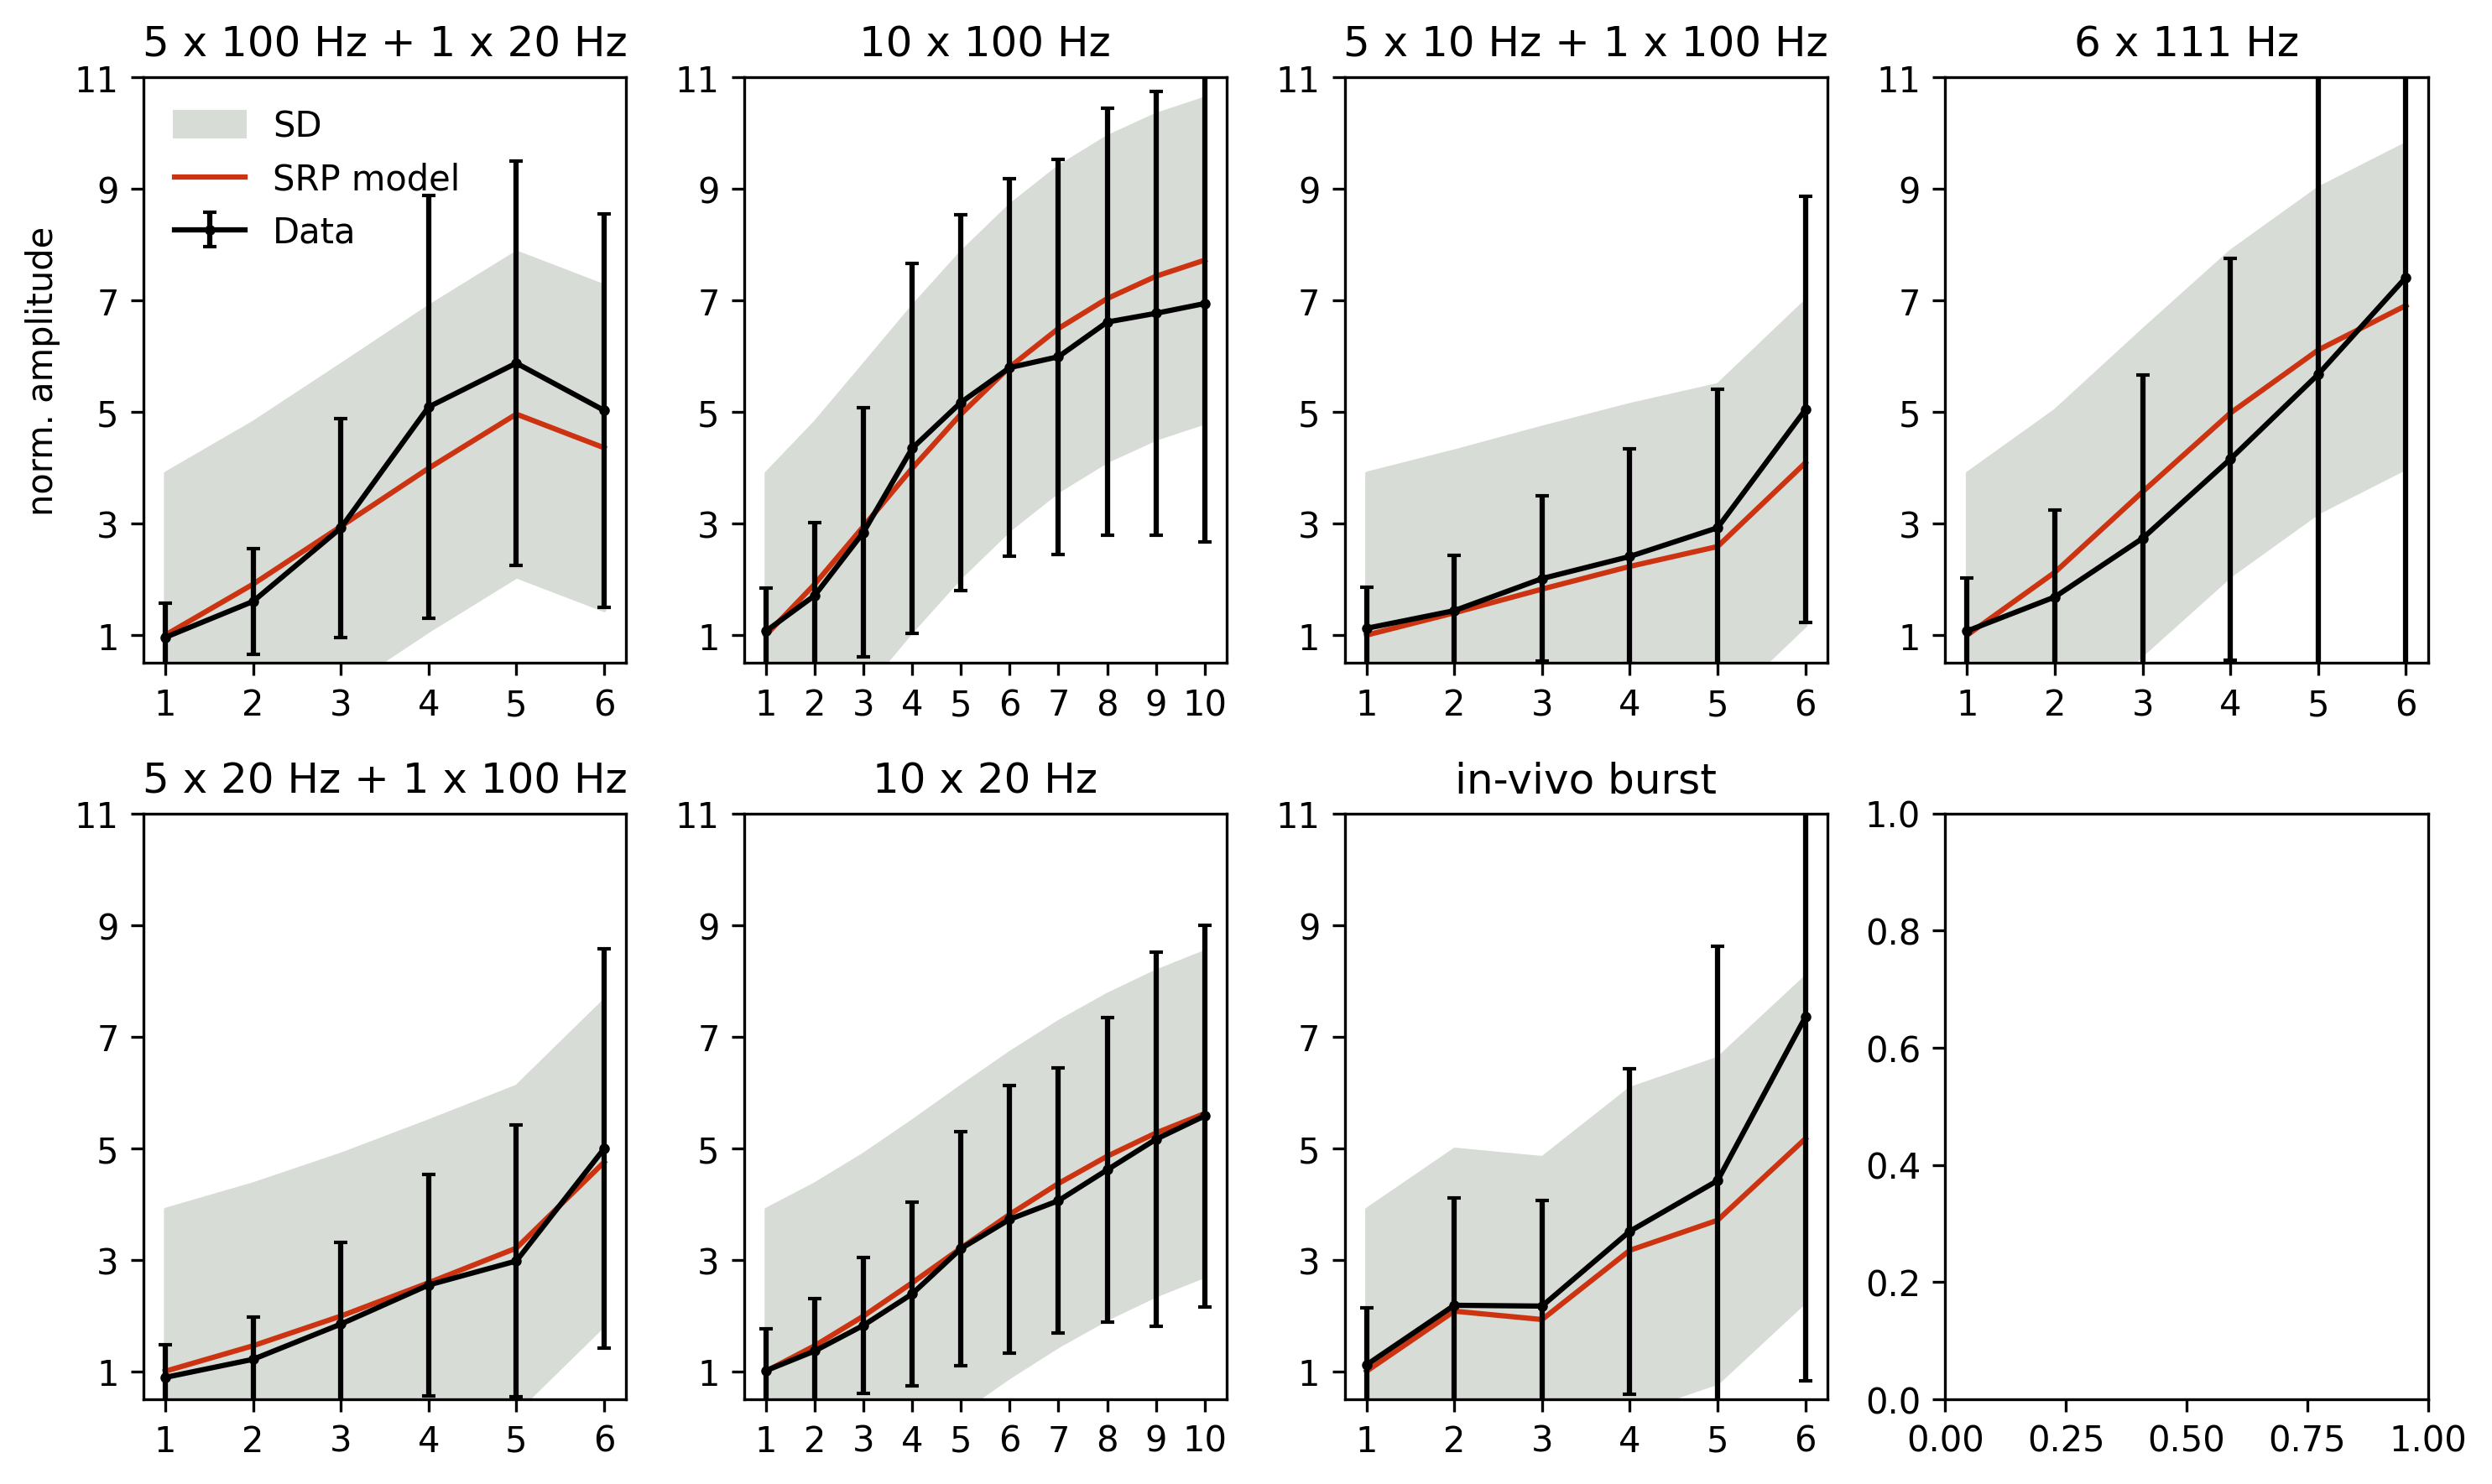

In [ ]:
model = easySRP(**params)

fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]) = plt.subplots(2, 4, figsize=(10, 6))
axes = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)

plot_srp_easySRP(axes, params, target_dict, stimulus_dict, protocols=protocol_names)
fig.savefig('plot_srp_easySRP.svg', dpi=1200, transparent=True, bbox_inches='tight')

**Optional**: Plot the predicted and recorded PSP or PSC amplitudes corresponding to a certain protocol, a boxplot of the mean squared errors (per protocol) of the fit, and the estimated efficacy kernel by using these lines.

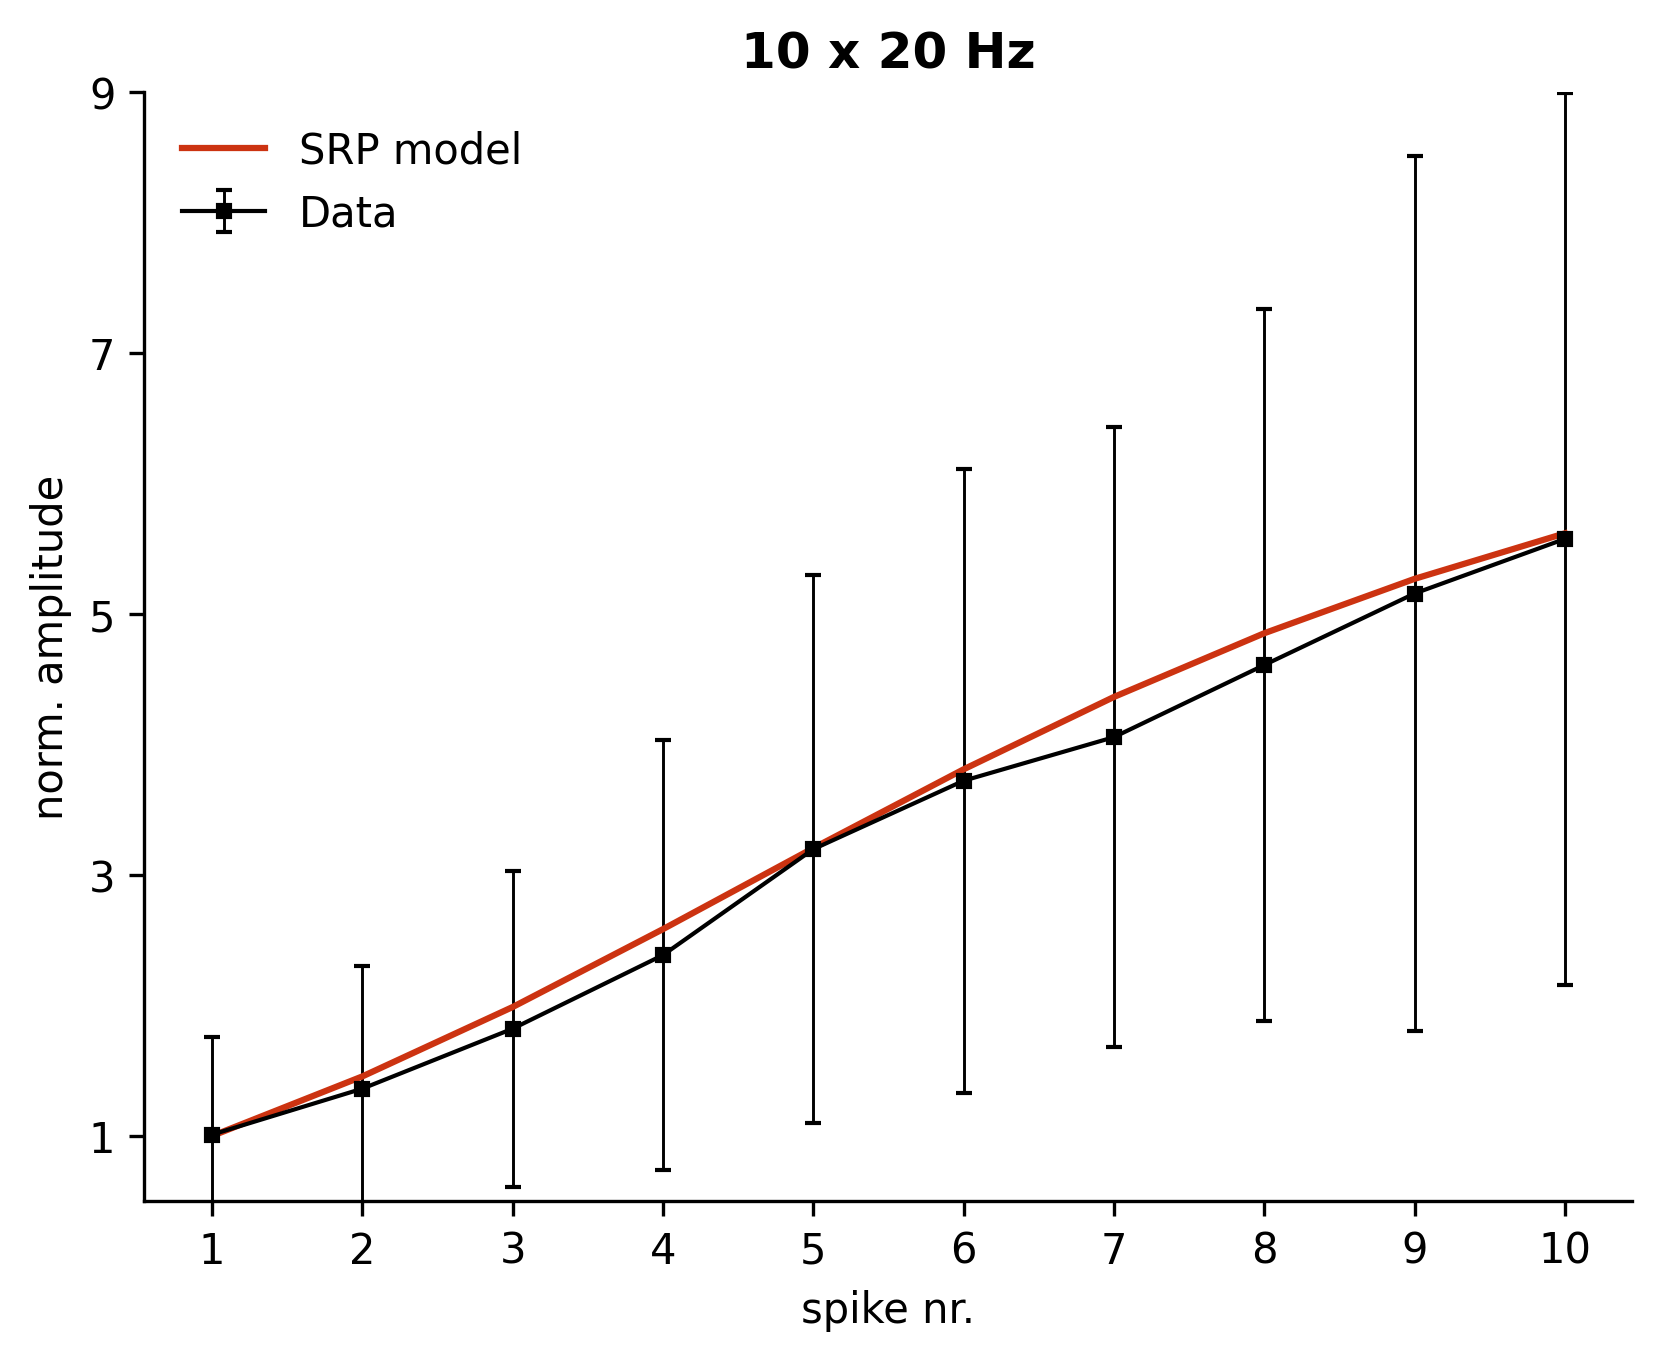

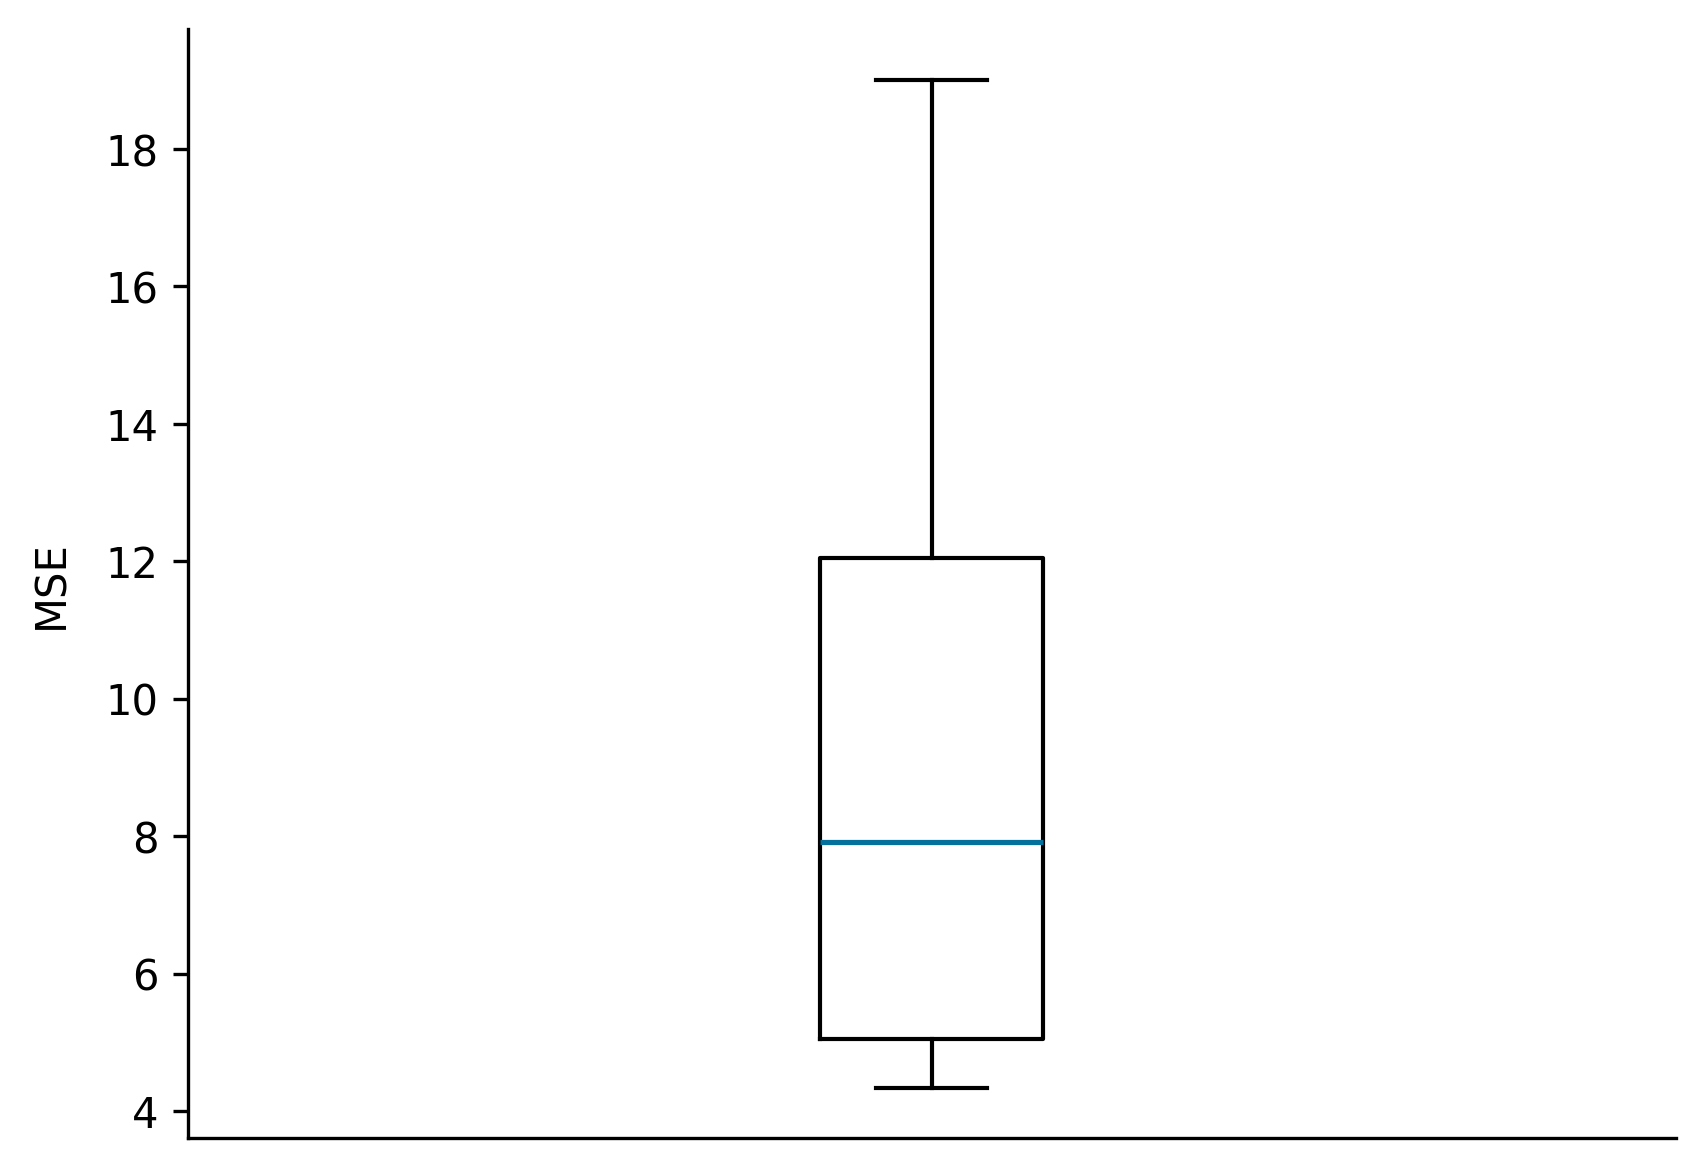

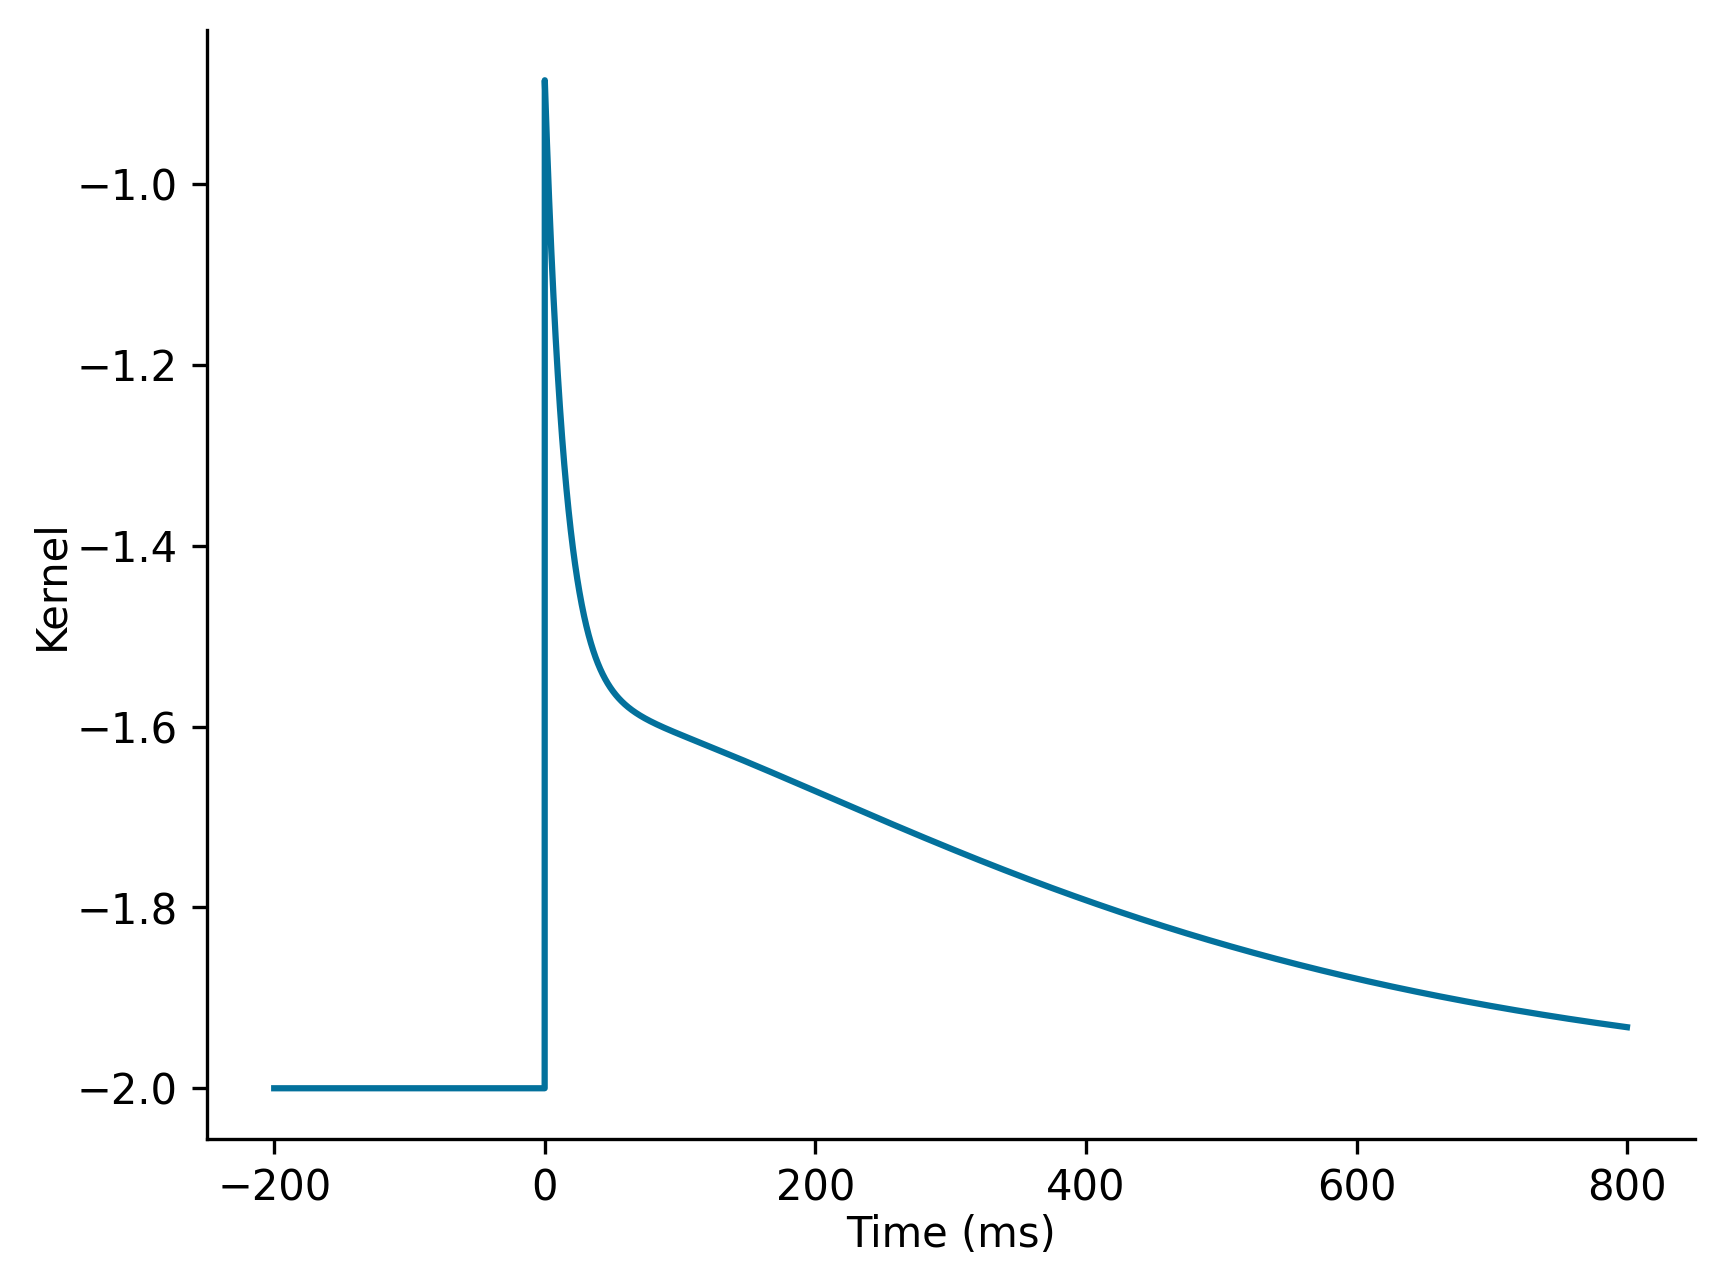

In [ ]:
# Compute MSEs
mean_dict = {protocol : model.run_ISIvec(isivec)[0] for protocol,
             isivec in stimulus_dict.items()}

mses = []
for protocol, responses in target_dict.items():
  mse = mse_loss({protocol:responses}, mean_dict)
  mses.append(mse)

# Plot fit
chosen_prot = "20"
fig1, axis1 = plt.subplots()
plot_fit_easySRP(axis1, model, target_dict, stimulus_dict, chosen_prot, protocols=protocol_names)
fig1.savefig("plot_fit.svg", transparent=True)

# Plot MSEs Boxplot
fig2, axis2 = plt.subplots()
plot_mse_fig(axis2, mses)
fig2.savefig("plot_mses.svg", transparent=True)

# Plot Efficacy Kernel
fig3, axis3 = plt.subplots()
plot_kernel_easySRP(axis3, model)
fig3.savefig("plot_kernel.svg", transparent=True)

# Fitting the SRP model to synaptic responses with hand-tuned parameters
The user manually selects and adjusts values for each parameter to fit the model to a synapse’s postsynaptic responses.

22. Import the necessary packages by executing the following lines of code:

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from srplasticity.srp import easySRP
from srplasticity.srp_extrafuncs import (
    _EasySRP_dict_to_tuple,
    mse_loss,
    plot_fit_easySRP,
    plot_mse_fig,
    plot_kernel_easySRP,
    plot_srp_easySRP)

23. To import the preprocessed data and assign it to a variable, run the following code. The user’s target dictionary file should replace the one used as an example here:

In [ ]:
with open('./srplasticity/data/star_protocol_example/chamberland2018_data.p', 'rb') as file:
    target_dict = pickle.load(file)

# Printing the value of a protocol key, corresponding to a numpy array of multiple runs
print(target_dict['10020'])

[[1.01850522 0.48455995 2.95830552 4.59666857 7.64615763 5.25715761]
 [0.85596624 1.95112317 1.78137051 6.7391543  3.6820769  6.57814617]
 [0.66717776 0.84978912 2.93825183 4.29549536 6.98194736 4.42383817]
 ...
 [0.6617662  1.64273603 2.01054341 4.19868858 7.93097954 3.37240932]
 [0.70803776 0.59540551 3.90006183 1.964751   2.83870185 2.6354018 ]
 [1.38430609 0.83563608 2.15310425 4.86469276 4.13889049 6.03307737]]


24. Assign to a variable (e.g., stimulus_dict) a dictionary in which each key represents the identification of a stimulation protocol, and each value is a list of its corresponding inter-spike intervals (ISIs). Use the following as an example:

**Note**: The variable `protocol_names` is a dictionary in which the abbreviated names of the protocols are associated with their descriptive version. It is meant to be used later on in plotting functions to set more descriptive titles. It is therefore optional, its absence only resulting in these titles being set to the abbreviated names of the protocols from `stimulus_dict`.

In [ ]:
stimulus_dict = {
    "20": [0] + [50] * 9,
    "100": [0] + [10] * 9,
    "20100": [0, 50, 50, 50, 50, 10],
    "10020": [0, 10, 10, 10, 10, 50],
    "10100": [0, 100, 100, 100, 100, 10],
    "111": [0] + [5] * 5,
    "invivo": [0, 6, 90.9, 12.5, 25.6, 9],
}

# Optional dictionary of abbreviated protocol names and their discriptive version
protocol_names = {
    "100": "10 x 100 Hz",
    "20": "10 x 20 Hz",
    "111": "6 x 111 Hz",
    "20100": "5 x 20 Hz + 1 x 100 Hz",
    "10100": "5 x 10 Hz + 1 x 100 Hz",
    "10020": "5 x 100 Hz + 1 x 20 Hz",
    "invivo": "in-vivo burst",
}

25.	Define a dictionary containing SRP model parameters:

In [ ]:
params = {"mu_baseline": -2,
          "mu_amps": [10.24, -140.55,  350.49],
          "mu_taus": [15, 200, 300],
          "SD": None,
          "mu_scale": None}

26. Plot the predicted and recorded PSP or PSC amplitudese:

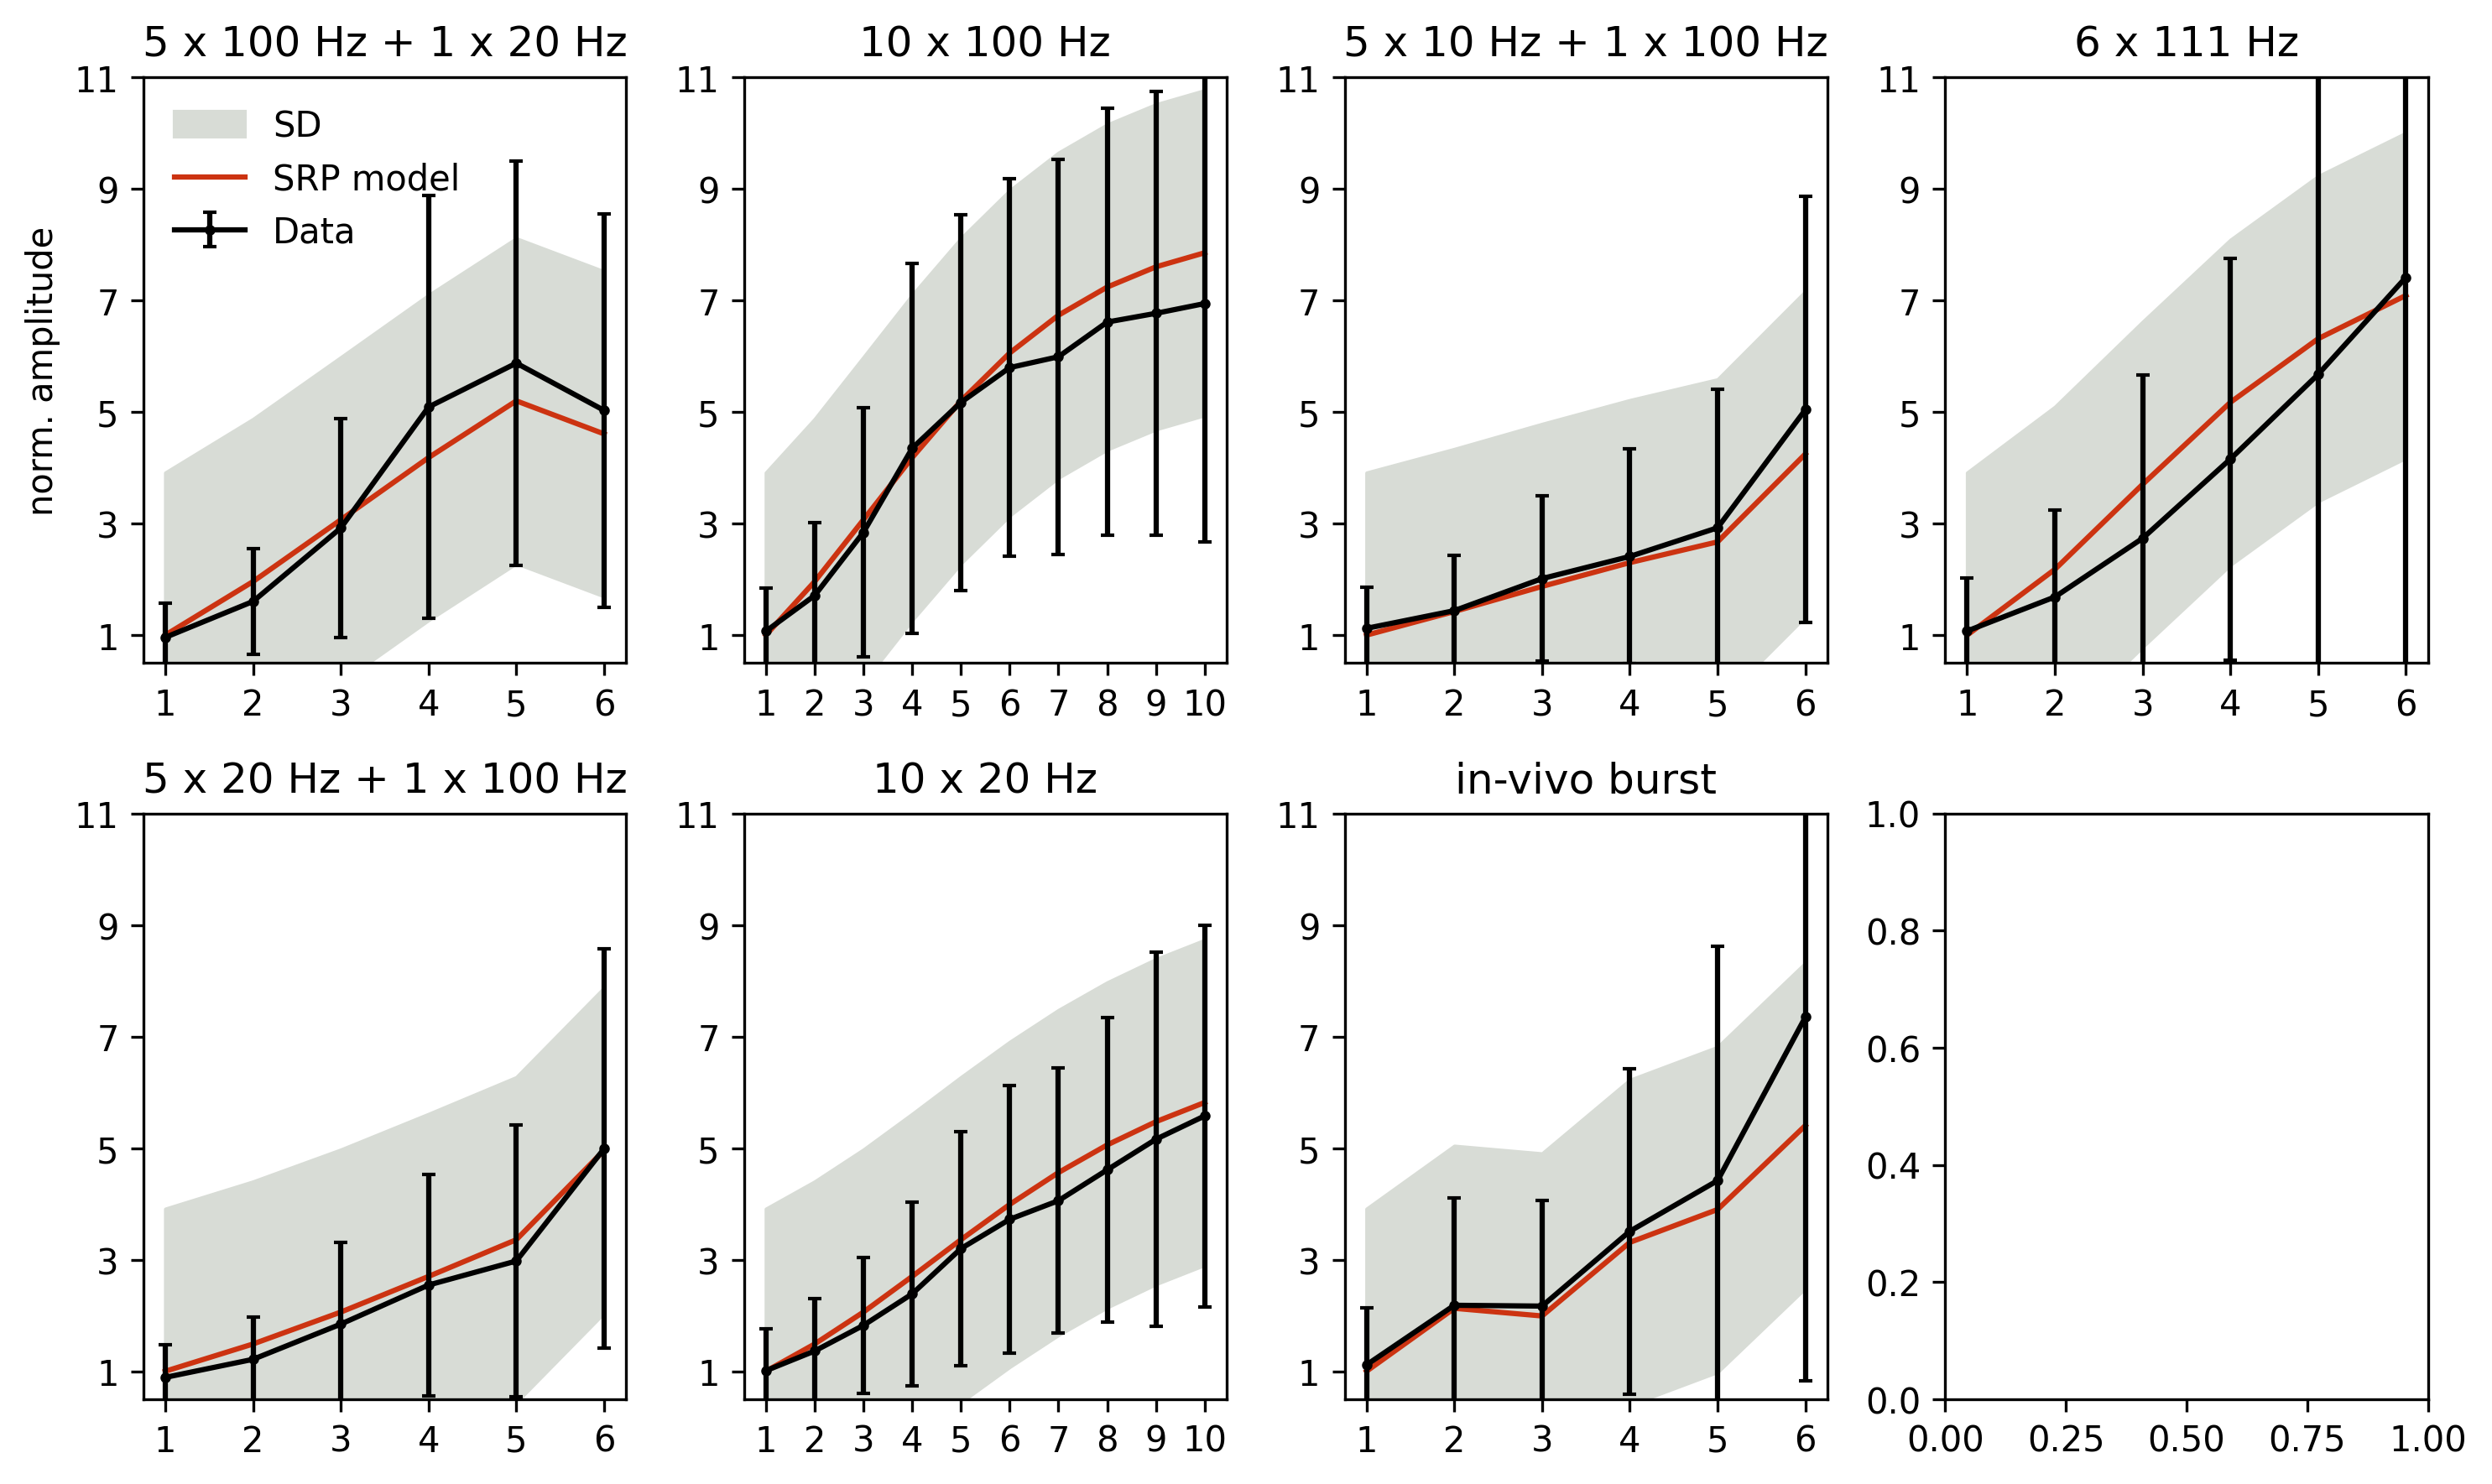

In [ ]:
model = easySRP(**params)

mean_dict = {protocol : model.run_ISIvec(isivec)[0] for protocol, isivec in stimulus_dict.items()}

total_mse_loss = mse_loss(target_dict, mean_dict)

params["SD"] = total_mse_loss ** 0.5

fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]) = plt.subplots(2, 4, figsize=(10, 6))
axes = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)

plot_srp_easySRP(axes, params, target_dict, stimulus_dict, protocols=protocol_names)
fig.savefig('plot_srp_easySRP.svg', dpi=1200, transparent=True, bbox_inches='tight')

27. Save the parameters:

In [ ]:
params_to_save = _EasySRP_dict_to_tuple(params)

# with open('srp_params.p', 'wb') as file:
#     pickle.dump(params_to_save, file)

**Optional:** Plot the predicted and recorded PSP or PSC amplitudes corresponding to a certain protocol, a boxplot of the mean squared errors (per protocol) of the fit, and the estimated efficacy kernel by using these lines.

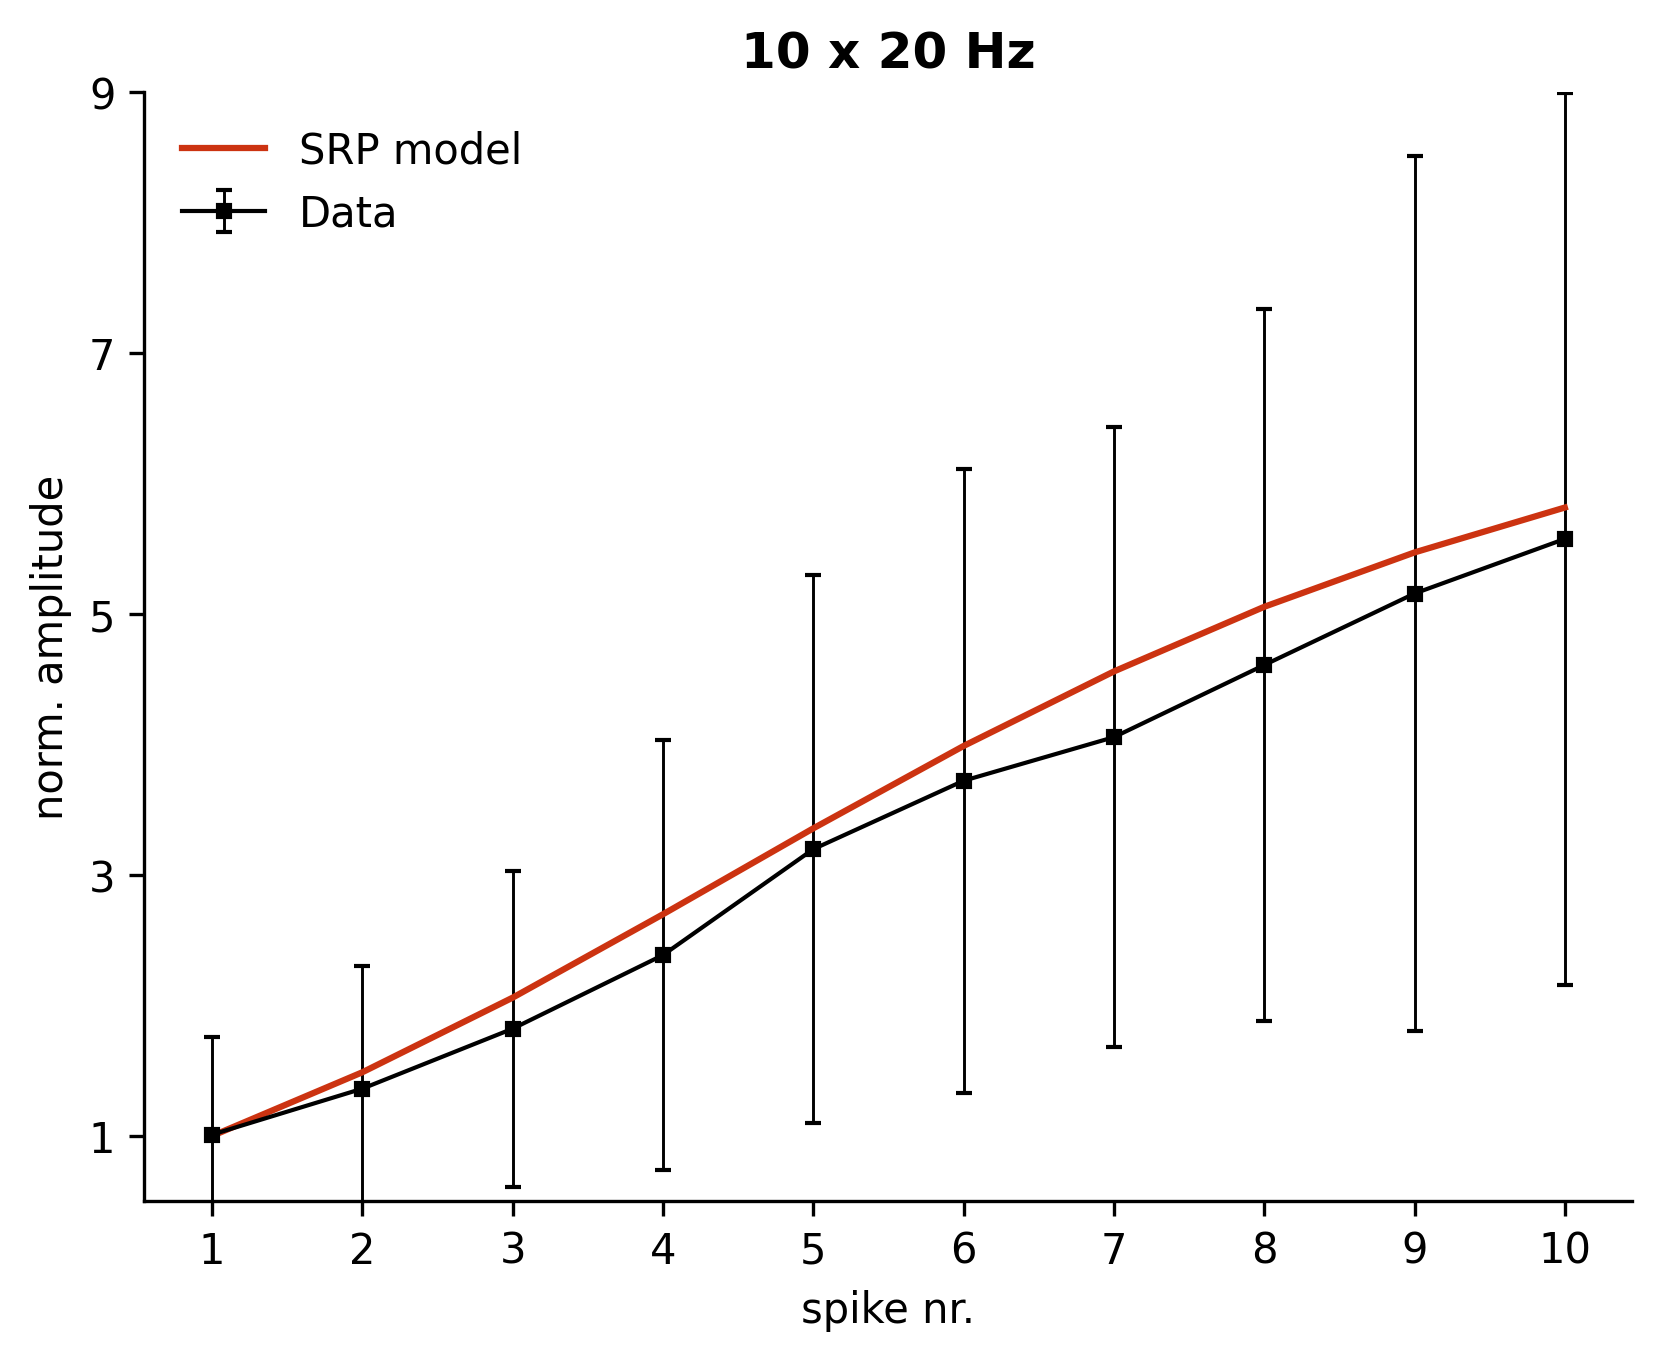

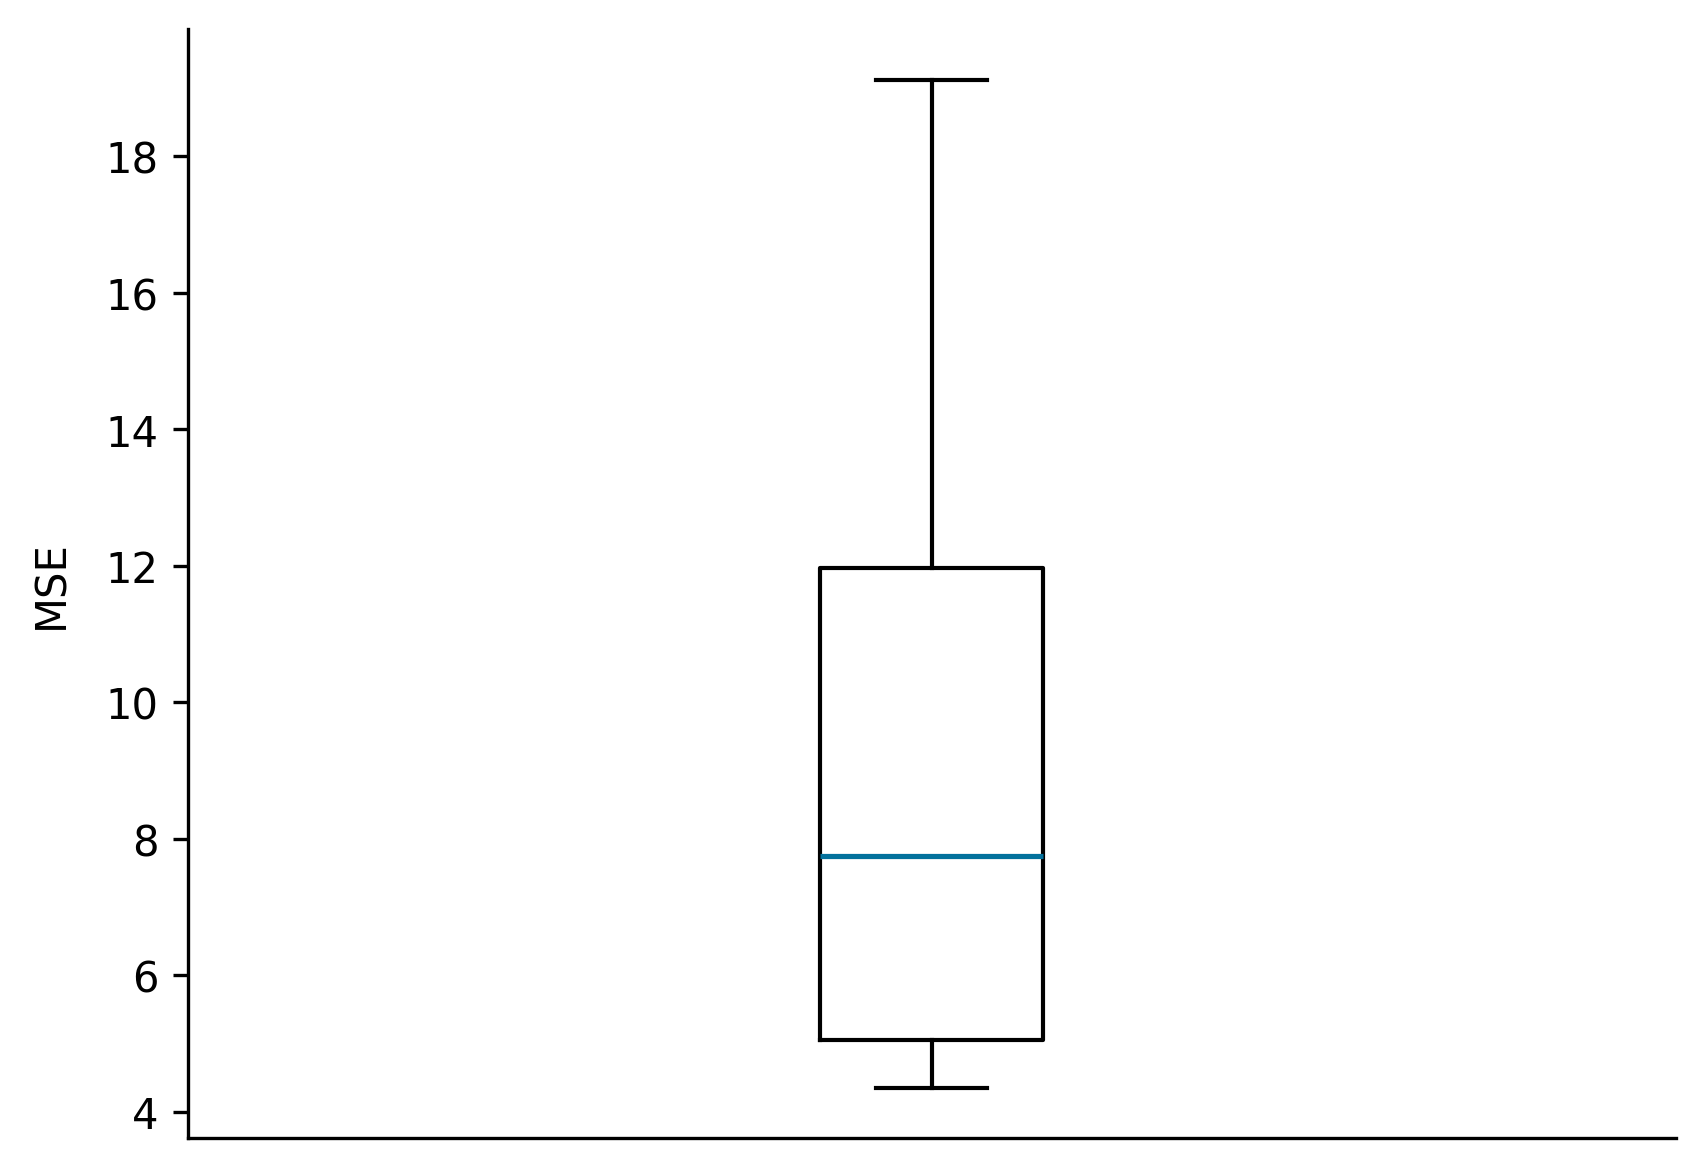

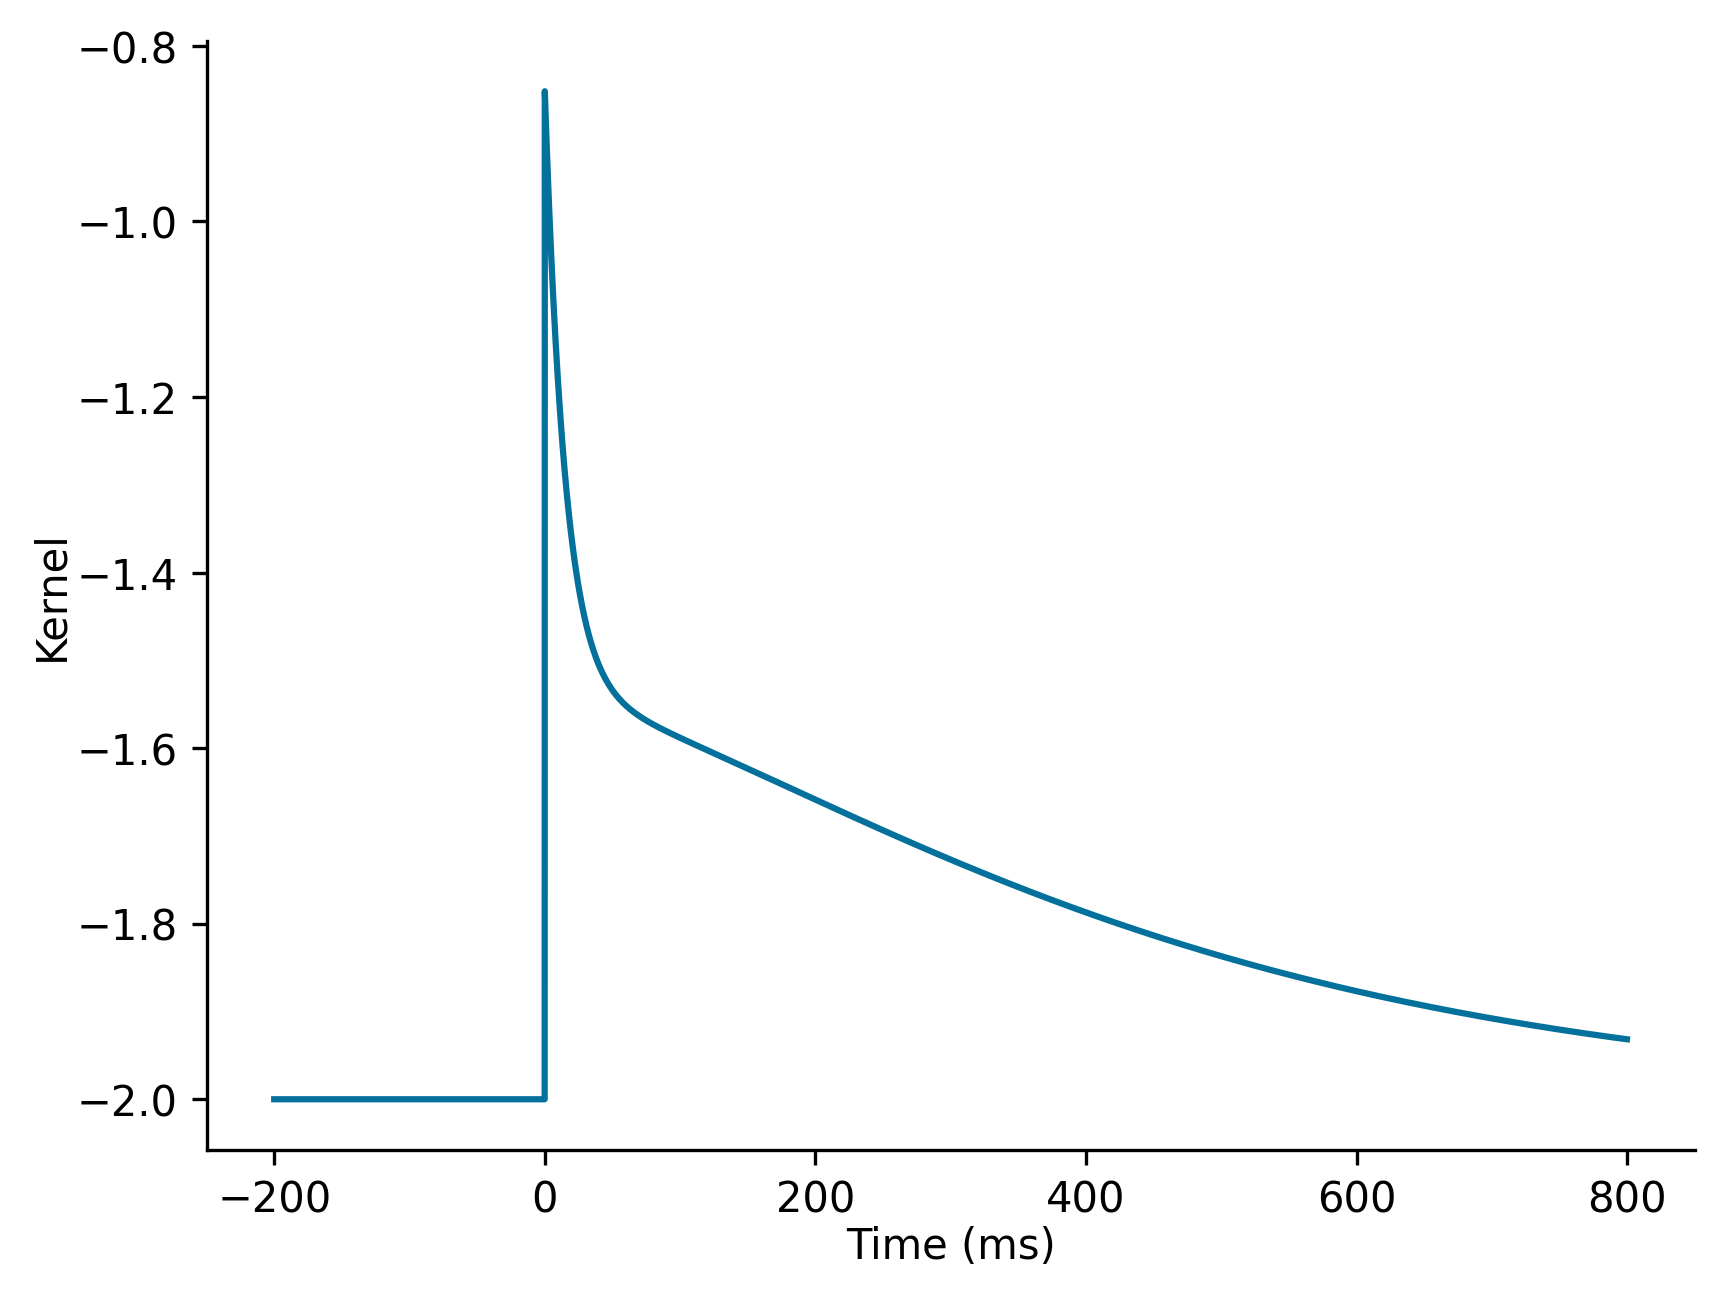

In [ ]:
# Compute MSEs
mses = []
for protocol, responses in target_dict.items():
  mse = mse_loss({protocol:responses}, mean_dict)
  mses.append(mse)

# Plot Fit
chosen_prot = "20"
fig1, axis1 = plt.subplots()
plot_fit_easySRP(axis1, model, target_dict, stimulus_dict, chosen_prot, protocols=protocol_names)
fig1.savefig("plot_fit.svg", transparent=True)

# Plot MSEs Boxplot
fig2, axis2 = plt.subplots()
plot_mse_fig(axis2, mses)
fig2.savefig("plot_mses.svg", transparent=True)

# Plot Efficacy Kernel
fig3, axis3 = plt.subplots()
plot_kernel_easySRP(axis3, model)
fig3.savefig("plot_kernel.svg", transparent=True)

# Fitting an SRP model with history dependent stochasticity to synaptic responses

29. Import the necessary packages:

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from srplasticity.srp import ExpSRP
from srplasticity.inference import fit_EXPSRP_model, _ExpSRP_tuple_to_dict
from srplasticity.srp_extrafuncs import (
    mse_loss,
    plot_fit_ExpSRP,
    plot_mse_fig,
    plot_kernel_ExpSRP,
    plot_srp_ExpSRP
    )

30. To import the preprocessed data and assign it to a variable, run the following code. The user’s target dictionary file should replace the one used as an example here:

In [ ]:
with open('./srplasticity/data/star_protocol_example/chamberland2018_data.p', 'rb') as file:
    target_dict = pickle.load(file)

# Printing the format of responses from multiple runs corresponding to the same stimulation protocol.
print(target_dict['10020'])

[[1.01850522 0.48455995 2.95830552 4.59666857 7.64615763 5.25715761]
 [0.85596624 1.95112317 1.78137051 6.7391543  3.6820769  6.57814617]
 [0.66717776 0.84978912 2.93825183 4.29549536 6.98194736 4.42383817]
 ...
 [0.6617662  1.64273603 2.01054341 4.19868858 7.93097954 3.37240932]
 [0.70803776 0.59540551 3.90006183 1.964751   2.83870185 2.6354018 ]
 [1.38430609 0.83563608 2.15310425 4.86469276 4.13889049 6.03307737]]


31. Assign to a variable (e.g., stimulus_dict) a dictionary in which each key represents the identification of a stimulation protocol, and each value is a list of its corresponding inter-spike intervals (ISIs). Use the following as an example:

**Note**: The variable `protocol_names` is a dictionary in which the abbreviated names of the protocols are associated with their descriptive version. It is meant to be used later on in plotting functions to set more descriptive titles. It is therefore optional, its absence only resulting in these titles being set to the abbreviated names of the protocols from `stimulus_dict`.

In [ ]:
stimulus_dict = {
    "20": [0] + [50] * 9,
    "100": [0] + [10] * 9,
    "20100": [0, 50, 50, 50, 50, 10],
    "10020": [0, 10, 10, 10, 10, 50],
    "10100": [0, 100, 100, 100, 100, 10],
    "111": [0] + [5] * 5,
    "invivo": [0, 6, 90.9, 12.5, 25.6, 9],
}

# Optional dictionary of abbreviated protocol names and their discriptive version
protocol_names = {
    "100": "10 x 100 Hz",
    "20": "10 x 20 Hz",
    "111": "6 x 111 Hz",
    "20100": "5 x 20 Hz + 1 x 100 Hz",
    "10100": "5 x 10 Hz + 1 x 100 Hz",
    "10020": "5 x 100 Hz + 1 x 20 Hz",
    "invivo": "in-vivo burst",
}

print(stimulus_dict)

{'20': [0, 50, 50, 50, 50, 50, 50, 50, 50, 50], '100': [0, 10, 10, 10, 10, 10, 10, 10, 10, 10], '20100': [0, 50, 50, 50, 50, 10], '10020': [0, 10, 10, 10, 10, 50], '10100': [0, 100, 100, 100, 100, 10], '111': [0, 5, 5, 5, 5, 5], 'invivo': [0, 6, 90.9, 12.5, 25.6, 9]}


32. Define two lists of time constants corresponding to the efficacy and variance kernels:

In [ ]:
mu_taus = [15, 200, 300]
sigma_taus = [15, 100, 300]

33. Retrieve the fitted parameters by running the following line:

In [ ]:
#Initialization
x0 = [0.1 for i in range(0, len(mu_taus)+len(sigma_taus)+3)]

srp_params = fit_EXPSRP_model(x0, stimulus_dict, target_dict, mu_taus, sigma_taus)[0]
params = _ExpSRP_tuple_to_dict(srp_params)
print(srp_params)
print(params)

(-1.9291807203597062, array([   9.69234919, -140.74518102,  350.2685745 ]), array([ 15, 200, 300]), -1.6134418762930591, array([ 15.77404761, -41.0153024 , 229.99748633]), array([ 15, 100, 300]), None, 4.496811024643692)
{'mu_baseline': -1.9291807203597062, 'mu_amps': array([   9.69234919, -140.74518102,  350.2685745 ]), 'mu_taus': array([ 15, 200, 300]), 'sigma_baseline': -1.6134418762930591, 'sigma_amps': array([ 15.77404761, -41.0153024 , 229.99748633]), 'sigma_taus': array([ 15, 100, 300]), 'mu_scale': None, 'sigma_scale': 4.496811024643692}


34. Save the parameters by using the following code:

In [ ]:
with open('ExpSRP_params.p', 'wb') as file:
     pickle.dump(srp_params, file)

**Optional:** Plot the predicted and recorded PSP or PSC amplitudes by using the following code

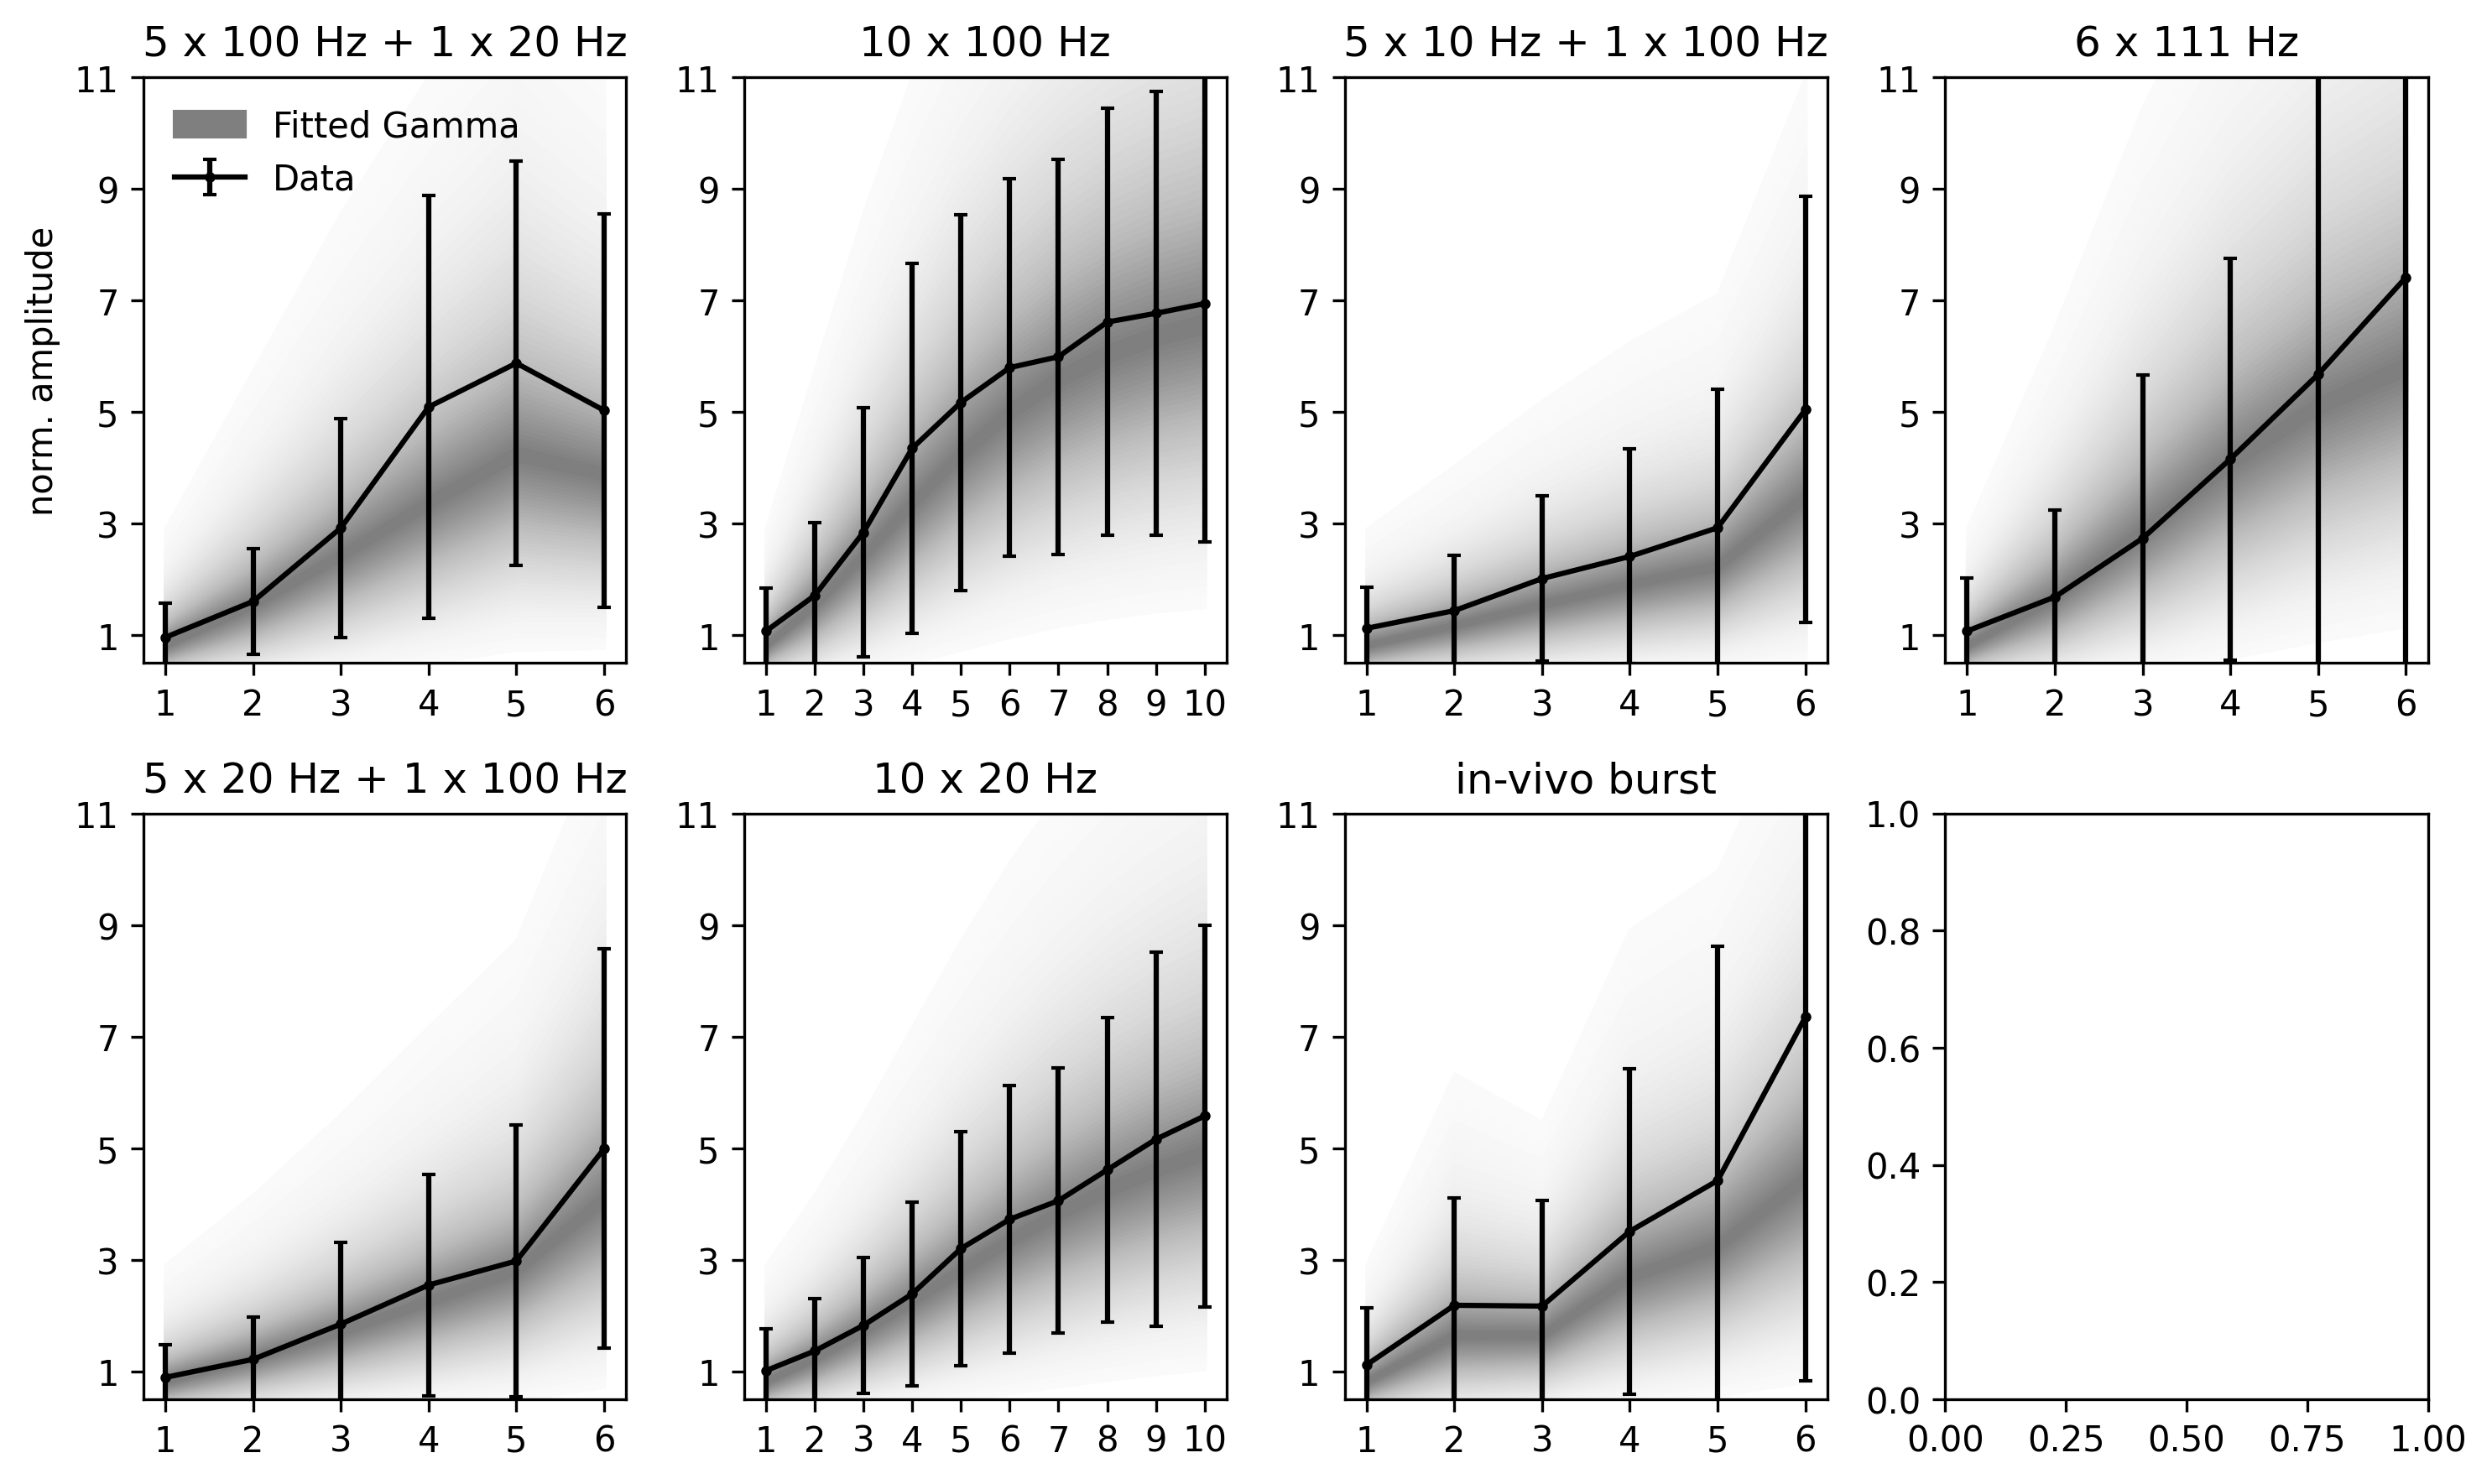

In [ ]:
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]) = plt.subplots(2, 4, figsize=(10, 6))
axes = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)

plot_srp_ExpSRP(axes, params, target_dict, stimulus_dict, protocols=protocol_names)
fig.savefig('plot_srp_ExpSRP.svg', dpi=1200, transparent=True, bbox_inches='tight')

**Optional:** Plot the predicted and recorded PSP or PSC amplitudes corresponding to a certain protocol, a boxplot of the mean squared errors (per protocol) of the fit, and the estimated efficacy kernel by using these lines.

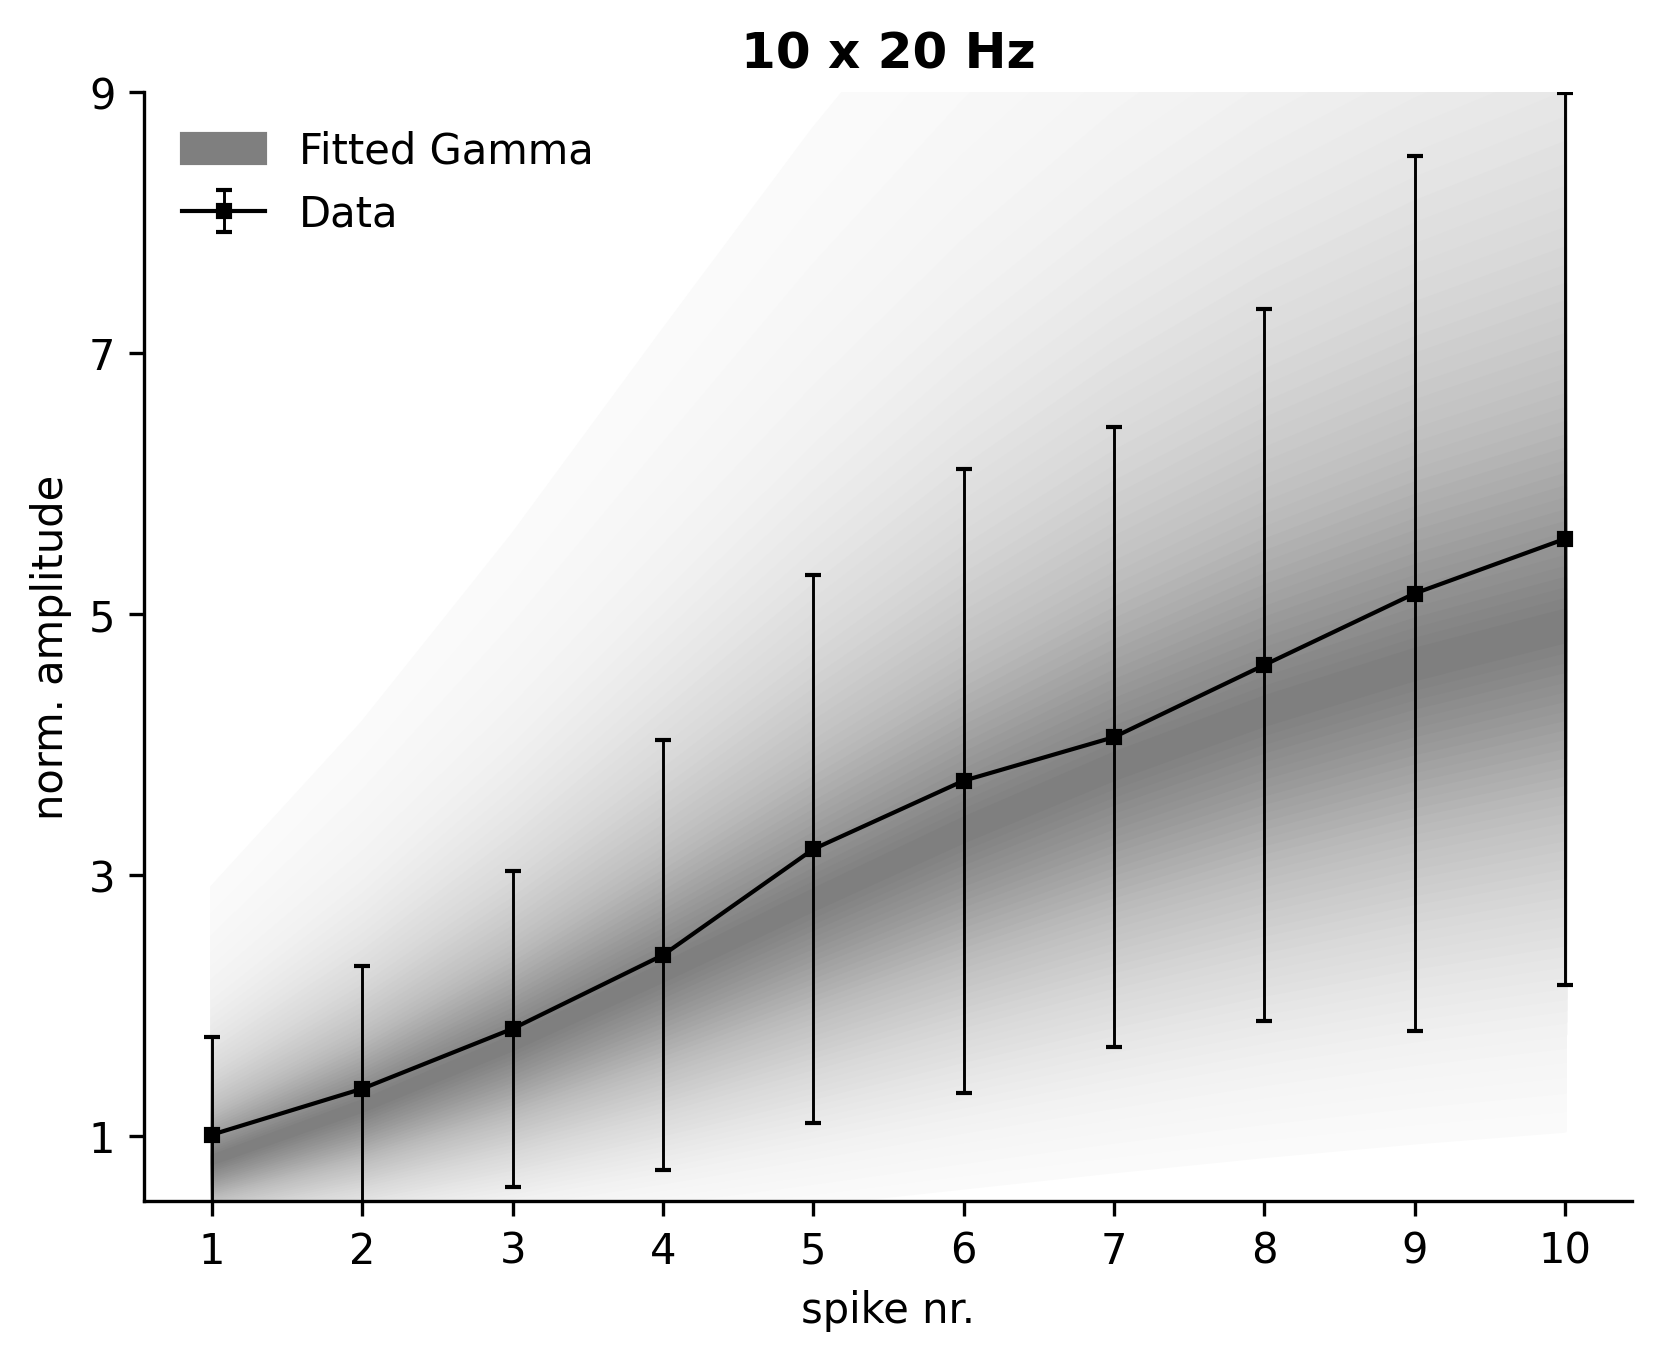

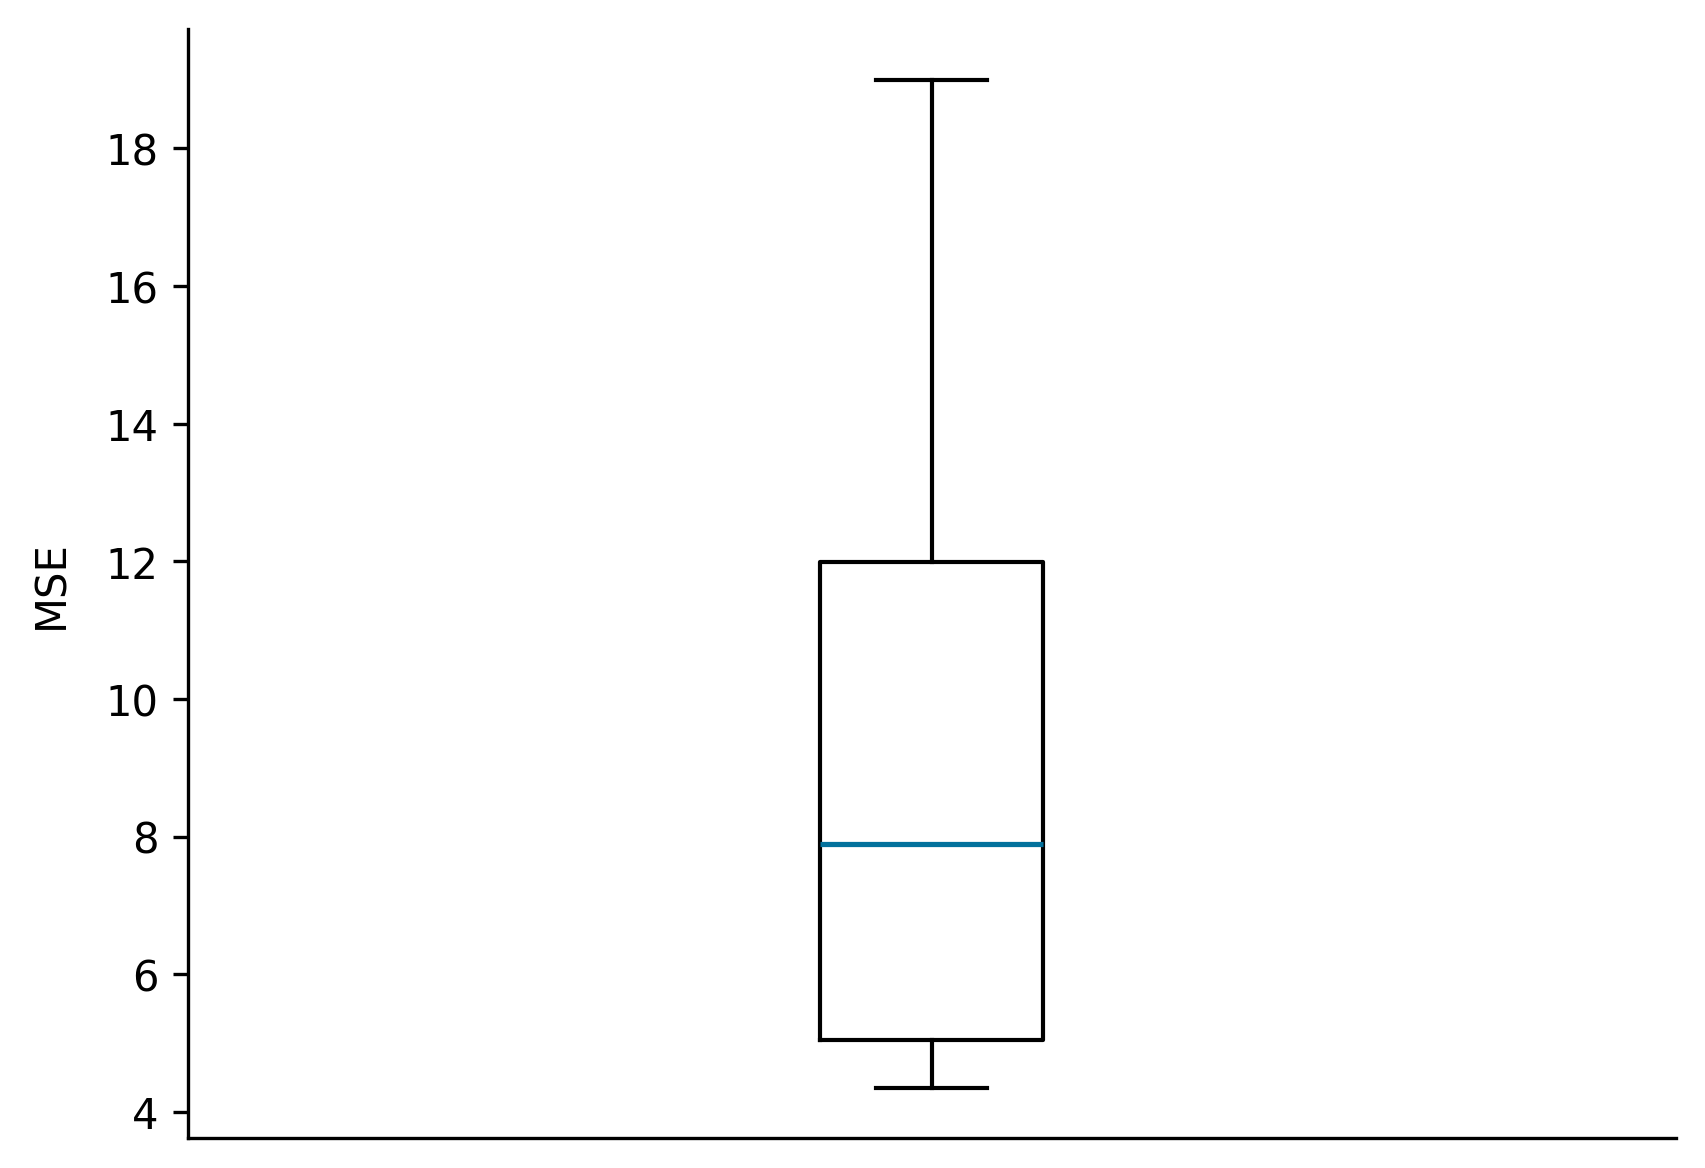

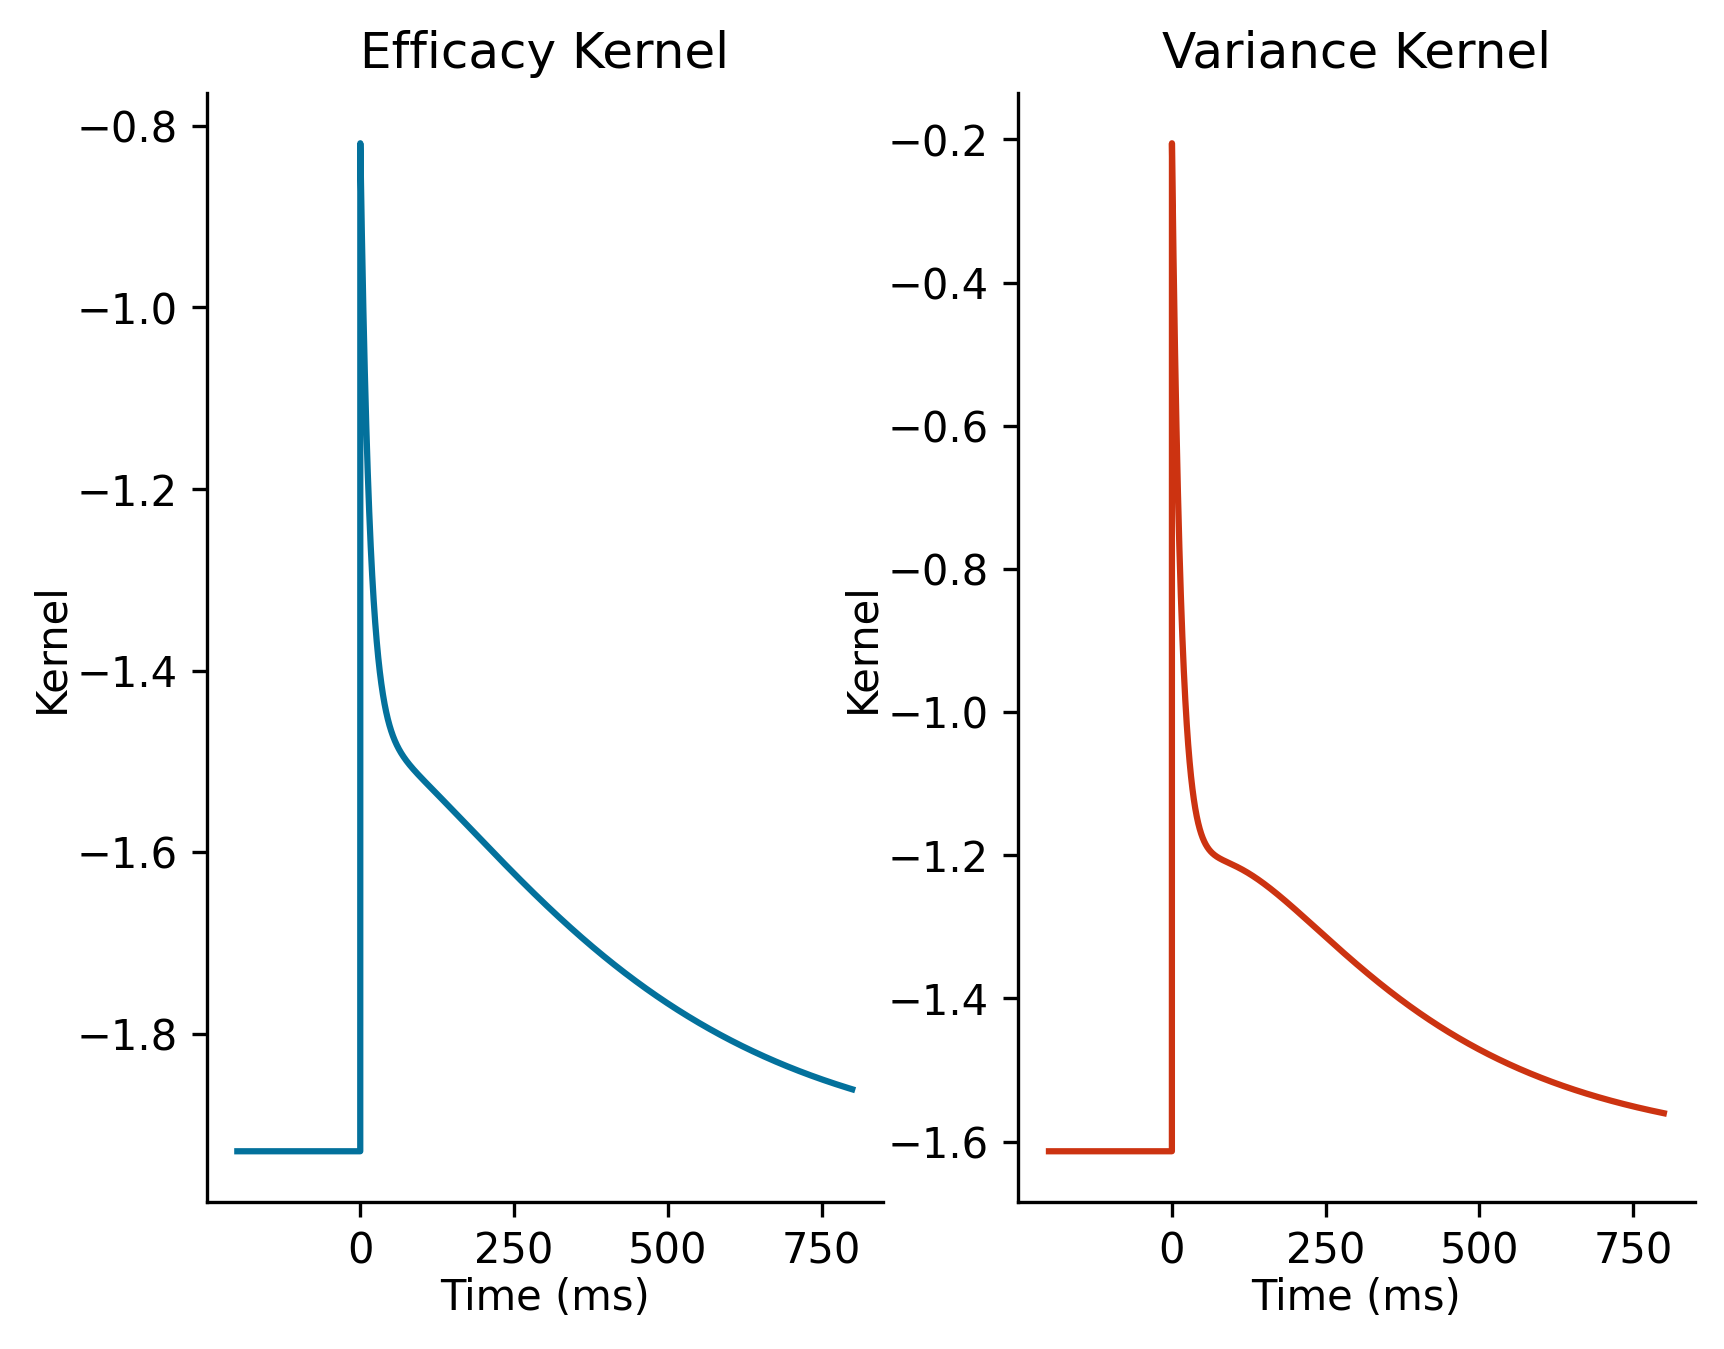

In [ ]:
# Instantiate Model
model = ExpSRP(**params)
Exp_model = ExpSRP(**params)
# Compute MSEs
mean_dict = {protocol : model.run_ISIvec(isivec)[0] for protocol, isivec in stimulus_dict.items()}

mses = []
for protocol, responses in target_dict.items():
  mse = mse_loss({protocol:responses}, mean_dict)
  mses.append(mse)

# Plot Fit
chosen_prot = "20"
fig1, axis1 = plt.subplots()
plot_fit_ExpSRP(axis1, model, target_dict, stimulus_dict, chosen_prot, protocols=protocol_names)
fig1.savefig("plot_fit.svg", transparent=True)

# Plot MSEs Boxplot
fig2, axis2 = plt.subplots()
plot_mse_fig(axis2, mses)
fig2.savefig("plot_mses.svg", transparent=True)

# Plot Efficacy Kernel
fig3, (axis3, axis4) = plt.subplots(1, 2)
plot_kernel_ExpSRP(axis3, axis4, model)
fig3.savefig("plot_kernel.svg", transparent=True)

# Computing the mean squared errors over all runs and plotting the corresponding distribution

35. Import the following:

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from srplasticity.srp import easySRP
from srplasticity.srp_extrafuncs import (
    _EasySRP_tuple_to_dict,
    mse_loss,
    plot_mse_fig)

36. To import the preprocessed data and assign it to a variable, run the following code. The user’s target dictionary file should replace the one used as an example here:

In [ ]:
with open('./srplasticity/data/star_protocol_example/chamberland2018_data.p', 'rb') as file:
    target_dict = pickle.load(file)

# Printing the format of responses from multiple runs corresponding to the same stimulation protocol.
print(target_dict['10020'])

[[1.01850522 0.48455995 2.95830552 4.59666857 7.64615763 5.25715761]
 [0.85596624 1.95112317 1.78137051 6.7391543  3.6820769  6.57814617]
 [0.66717776 0.84978912 2.93825183 4.29549536 6.98194736 4.42383817]
 ...
 [0.6617662  1.64273603 2.01054341 4.19868858 7.93097954 3.37240932]
 [0.70803776 0.59540551 3.90006183 1.964751   2.83870185 2.6354018 ]
 [1.38430609 0.83563608 2.15310425 4.86469276 4.13889049 6.03307737]]


37. Assign to a variable (e.g., stimulus_dict) a dictionary in which each key represents the identification of a stimulation protocol, and each value is a list of its corresponding inter-spike intervals (ISIs). Use the following as an example:

**Note**: The variable `protocol_names` is a dictionary in which the abbreviated names of the protocols are associated with their descriptive version. It is meant to be used later on in plotting functions to set more descriptive titles. It is therefore optional, its absence only resulting in these titles being set to the abbreviated names of the protocols from `stimulus_dict`.

In [ ]:
stimulus_dict = {
    "20": [0] + [50] * 9,
    "100": [0] + [10] * 9,
    "20100": [0, 50, 50, 50, 50, 10],
    "10020": [0, 10, 10, 10, 10, 50],
    "10100": [0, 100, 100, 100, 100, 10],
    "111": [0] + [5] * 5,
    "invivo": [0, 6, 90.9, 12.5, 25.6, 9],
}

# Optional dictionary of abbreviated protocol names and their discriptive version
protocol_names = {
    "100": "10 x 100 Hz",
    "20": "10 x 20 Hz",
    "111": "6 x 111 Hz",
    "20100": "5 x 20 Hz + 1 x 100 Hz",
    "10100": "5 x 10 Hz + 1 x 100 Hz",
    "10020": "5 x 100 Hz + 1 x 20 Hz",
    "invivo": "in-vivo burst",
}

print(stimulus_dict)

{'20': [0, 50, 50, 50, 50, 50, 50, 50, 50, 50], '100': [0, 10, 10, 10, 10, 10, 10, 10, 10, 10], '20100': [0, 50, 50, 50, 50, 10], '10020': [0, 10, 10, 10, 10, 50], '10100': [0, 100, 100, 100, 100, 10], '111': [0, 5, 5, 5, 5, 5], 'invivo': [0, 6, 90.9, 12.5, 25.6, 9]}


38. Open the saved parameters and convert the tuple to a dictionary as seen below:

In [ ]:
with open('./srplasticity/data/star_protocol_example/srp_params_example.p', 'rb') as file:
    srp_params = pickle.load(file)

params = _EasySRP_tuple_to_dict(srp_params)

print(params)

{'mu_baseline': -1.929635039547934, 'mu_amps': array([   9.69239055, -140.98610815,  350.51968069]), 'mu_taus': array([ 15, 200, 300], dtype=int32), 'SD': 2.9026715358170505, 'mu_scale': None}


39. Compute the squared differences of all responses:

In [ ]:
model = easySRP(**params)

mean_dict = {protocol : model.run_ISIvec(isivec)[0] for protocol, isivec in stimulus_dict.items()}

mses = []
for protocol, responses in target_dict.items():
  mse = mse_loss({protocol:responses}, mean_dict)
  mses.append(mse)

40. Create a boxplot of the mean squared errors:

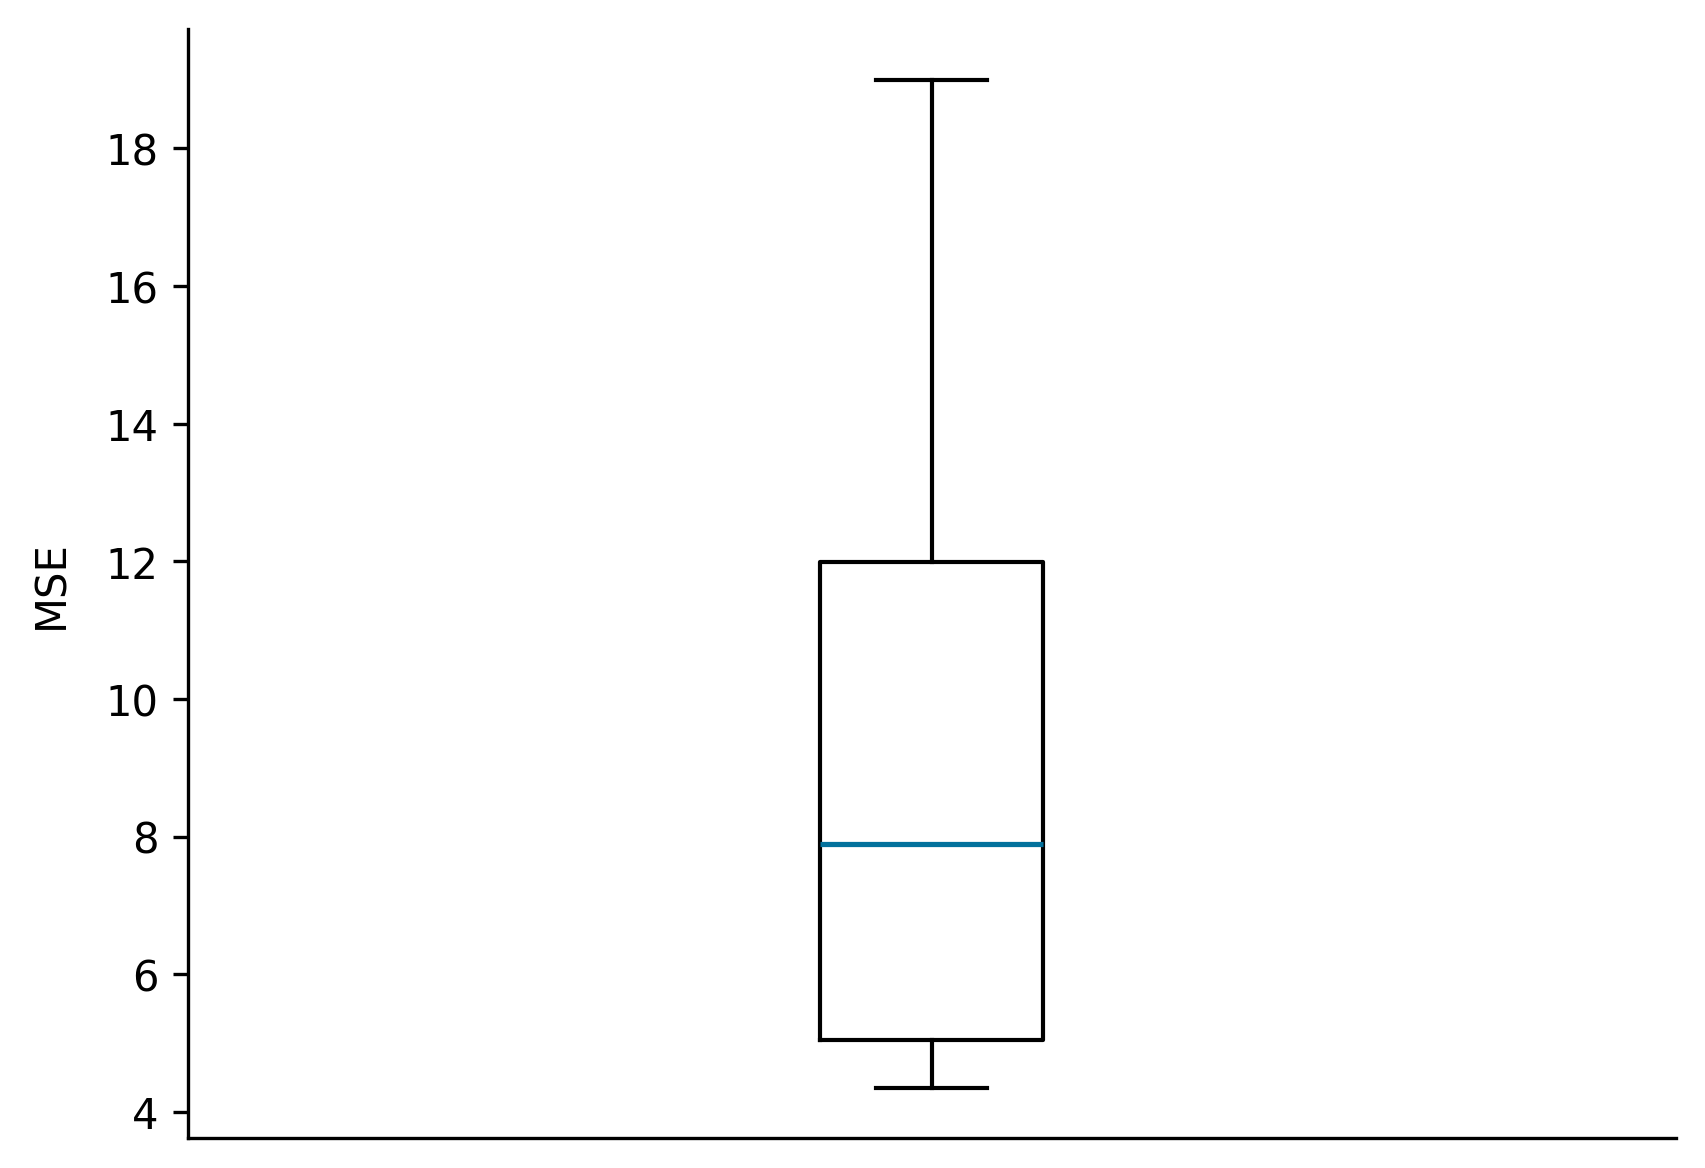

In [ ]:
fig1, axis1 = plt.subplots()
plot_mse_fig(axis1, mses)
fig1.savefig("plot_mses.svg", transparent=True)

# Simulating Model Response to Novel Stimuli

41. Import the necessary packages:

In [ ]:
import pickle
import matplotlib.pyplot as plt
from srplasticity.srp import easySRP, ExponentialKernel, _convolve_spiketrain_with_kernel
from srplasticity.tools import get_stimvec
from srplasticity.srp_extrafuncs import (
    _EasySRP_tuple_to_dict,
    get_poisson_ISIs,
    plot_spike_train,
    plot_estimates)

42. Open the saved parameters and convert the tuple to a dictionary as seen below:

In [ ]:
with open('./srplasticity/data/star_protocol_example/srp_params_example.p', 'rb') as file:
    easy_srp_params = pickle.load(file)

easy_srp_params = _EasySRP_tuple_to_dict(easy_srp_params)

print(params)

{'mu_baseline': -1.929635039547934, 'mu_amps': array([   9.69239055, -140.98610815,  350.51968069]), 'mu_taus': array([ 15, 200, 300], dtype=int32), 'SD': 2.9026715358170505, 'mu_scale': None}


43. To stochastically generate spike trains containing n spikes (`nspikes`) at k frequency (`rate`, in Hz) and compute the synapse’s peak normalized response amplitude for each spike to those spike trains, enter and run the following lines of code:

In [ ]:
easySRP_model = easySRP(**easy_srp_params)
isi_vec = list(get_poisson_ISIs(nspikes=30, rate=10))
spike_train = get_stimvec(isi_vec, dt=0.1, null=0, extra=0)
means, efficacies = easySRP_model.run_ISIvec(isi_vec, ntrials=100)

print(means)

[1.         1.28746334 1.86237651 2.35838636 1.98481154 3.18970483
 2.25648754 1.58792428 2.30007717 2.59006978 3.84278953 4.64841405
 4.11876425 4.55709138 5.04259186 4.73100432 5.03108907 6.2465899
 5.80773935 5.36937173 5.93965321 5.26474439 6.42852816 6.41303478
 4.93128726 6.4654386  3.19159733 4.80505097 3.80007047 4.14384227]


44. Use the following functions to plot and save the figures corresponding to the spike train and the estimated efficacies, these should appear similar (though not identical) to those in Figure 6.

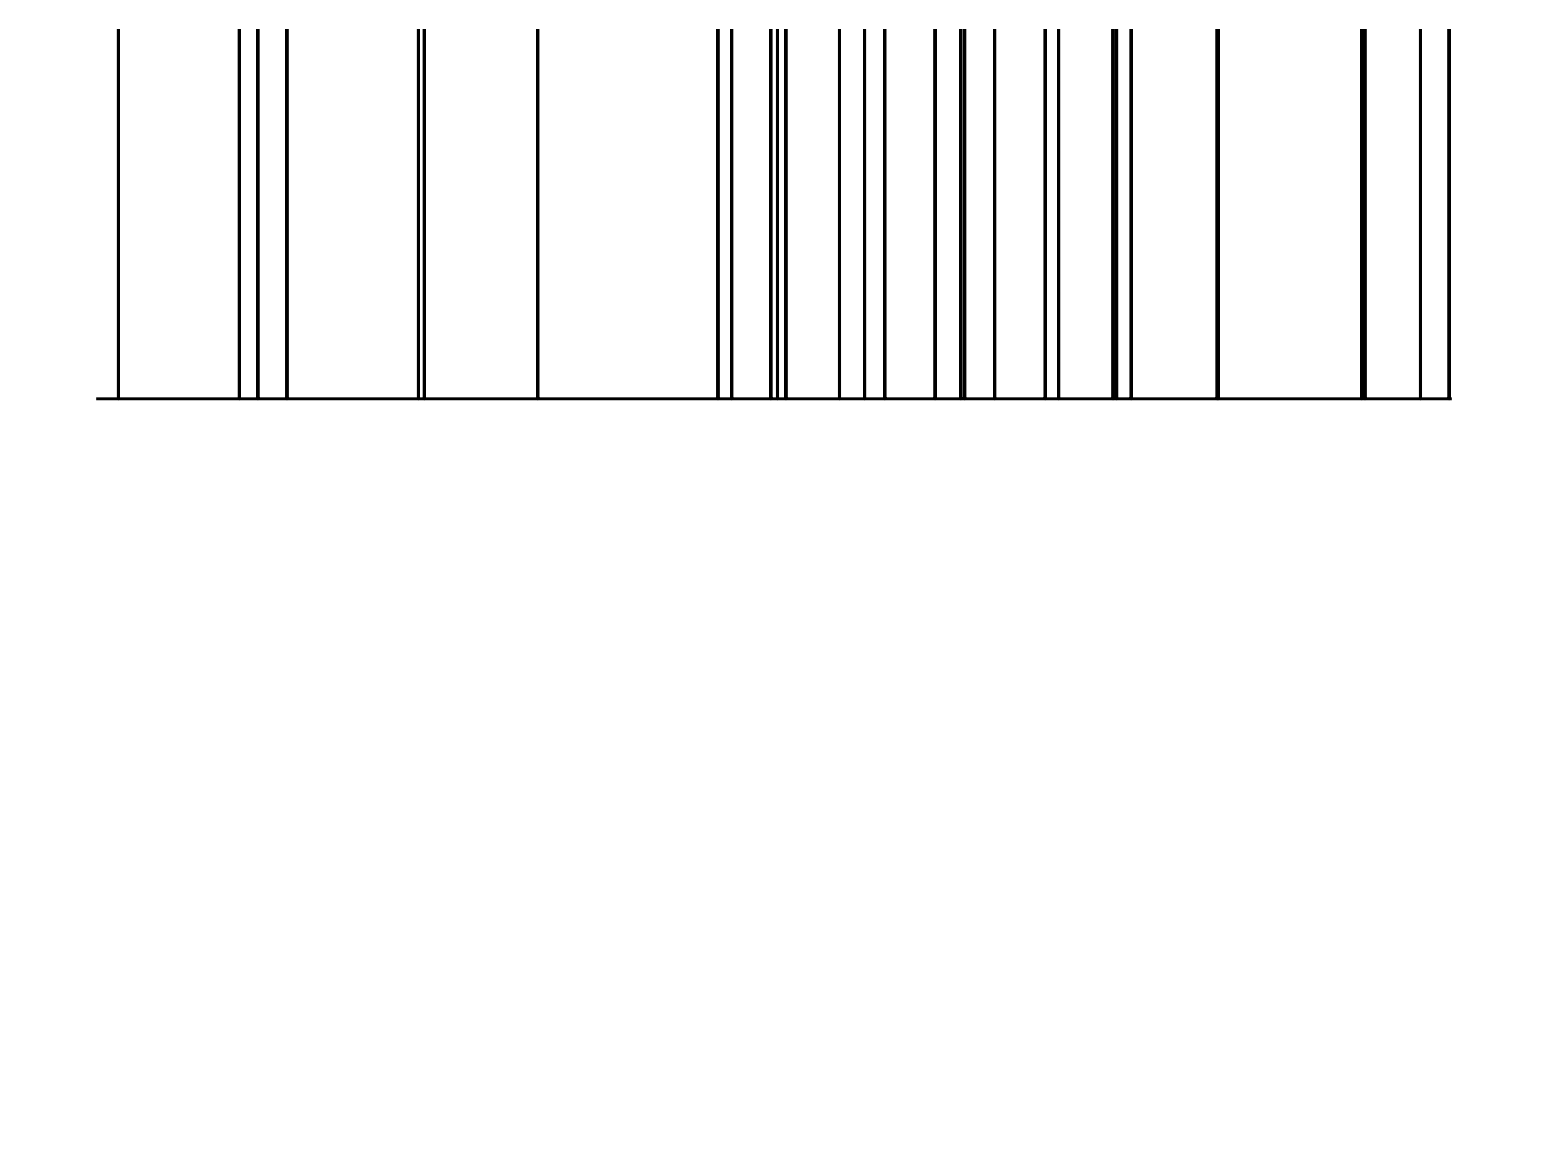

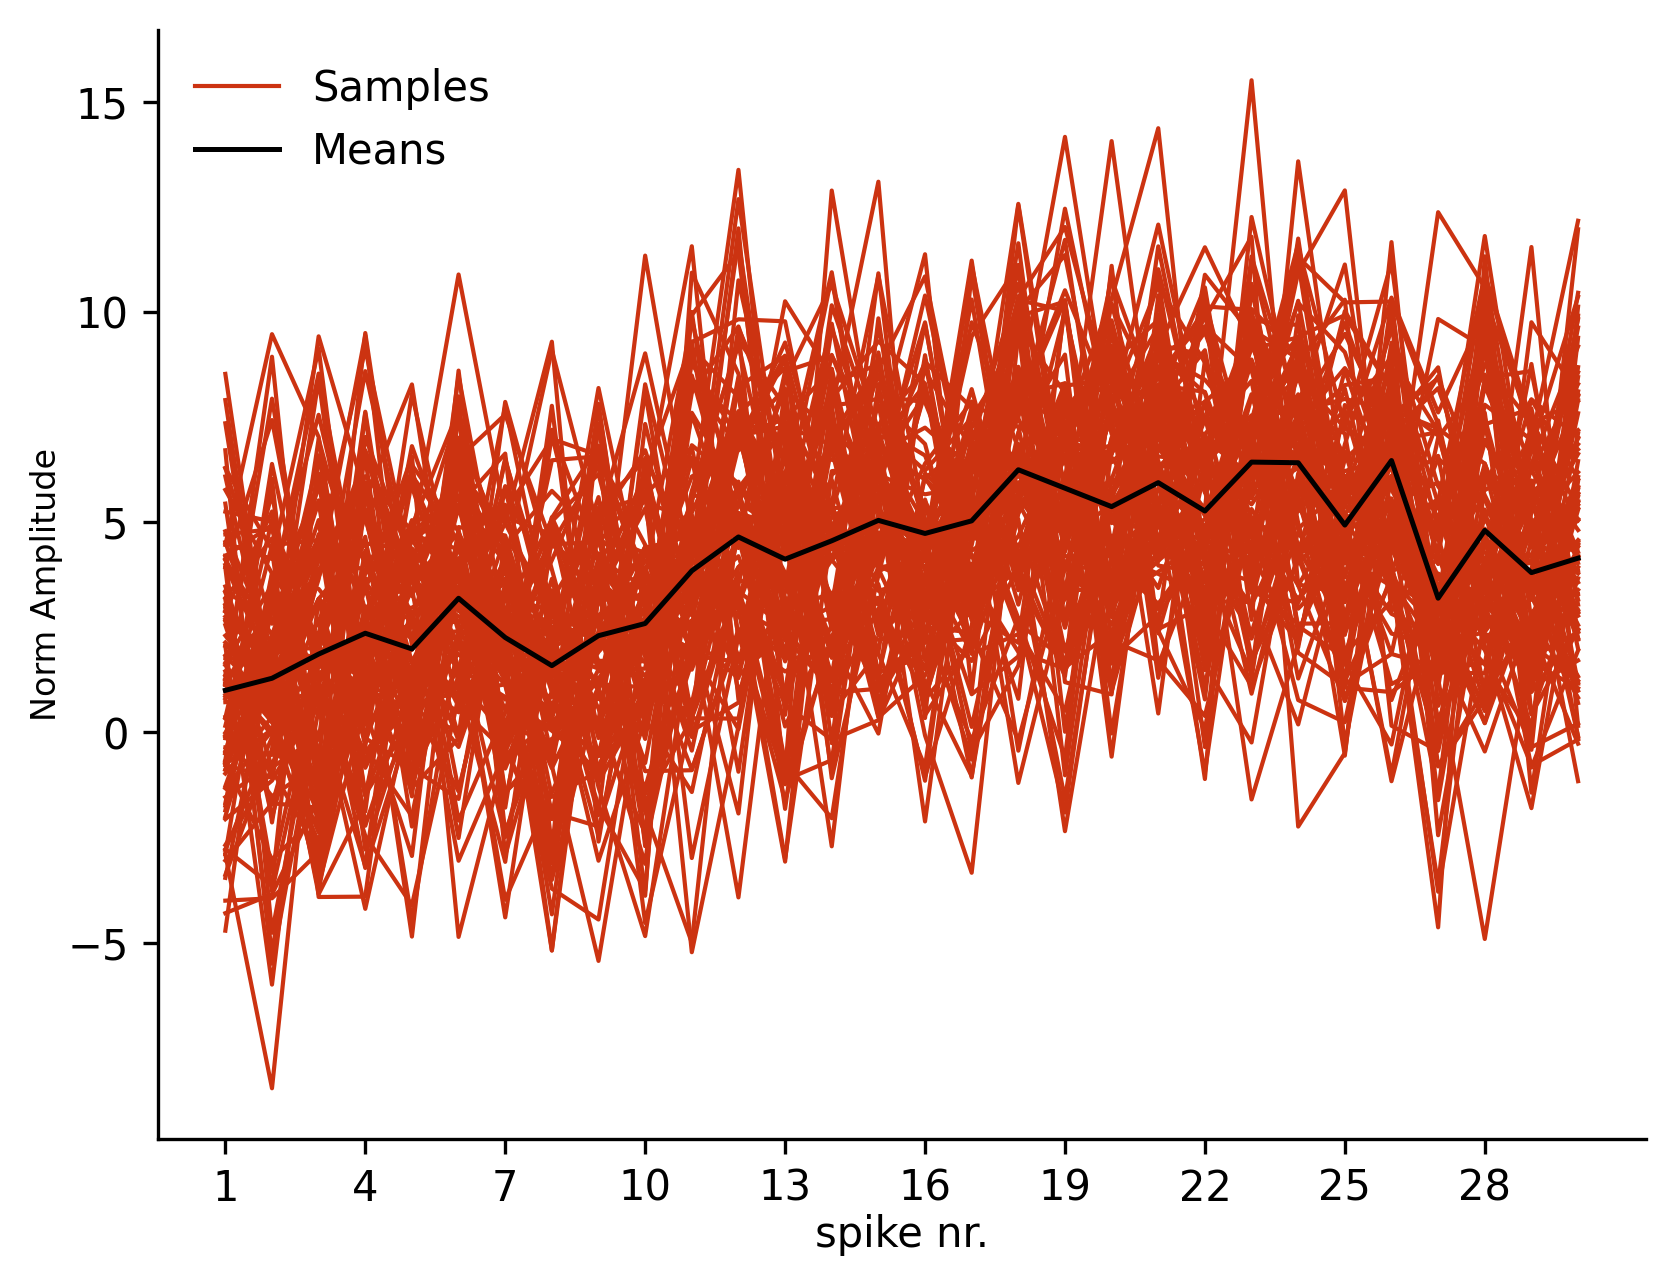

In [ ]:
# Spike train
fig1, axis1 = plt.subplots()
plot_spike_train(axis1, spike_train)
fig1.savefig("spike_train.svg", transparent=True, bbox_inches="tight")

# Estimated peak responses to novel stimuli
fig2, axis2 = plt.subplots()
plot_estimates(axis2, means, efficacies)
fig2.savefig("sim_responses.svg", transparent=True)

V. **Notebook only:** You can also predict post-synaptic currents (PSCs) or potentials (PSPs) in full by using the run_spiketrain method and performing a final kernel convolution. First, run the following code to predict normalized response for the entire simulated duration:

In [ ]:
easy_means, easy_SD, easy_efficacies, easy_efficacytrains = easySRP_model.run_spiketrain(
    spike_train, ntrials=100
)

VI. Now define the amplitude and decay time constant of an excitatory PSC (EPSC). These values are illustrative but you can set these values as needed to match real data for different respones.

In [ ]:
#PSC time constant
PSCtau = 50
#PCS ampltitude
PSCamp = -10

VII. Now define an EPSC kernel and convolve it with the inferred efficacies.

In [ ]:
PSCkernel = ExponentialKernel(PSCtau, PSCamp).kernel
# Inferred PSCs
PSCs_inferred = np.vstack(
    [_convolve_spiketrain_with_kernel(x, PSCkernel) for x in easy_efficacytrains]
)
#optionally add small Gaussian noise to simulate recording noise
PSCs_inferred += 0.05 * np.random.randn(PSCs_inferred.size).reshape(PSCs_inferred.shape)

VIII. Finally, plot the overlayed predicted PSCs to view the range of PSCs the model generates over 100 trials (equivalent to 100 sweeps of real data). Notice that it becomes feasible to study the predicted behaviour of a synapse for an arbitrary number of different protocols each of arbitrary length.

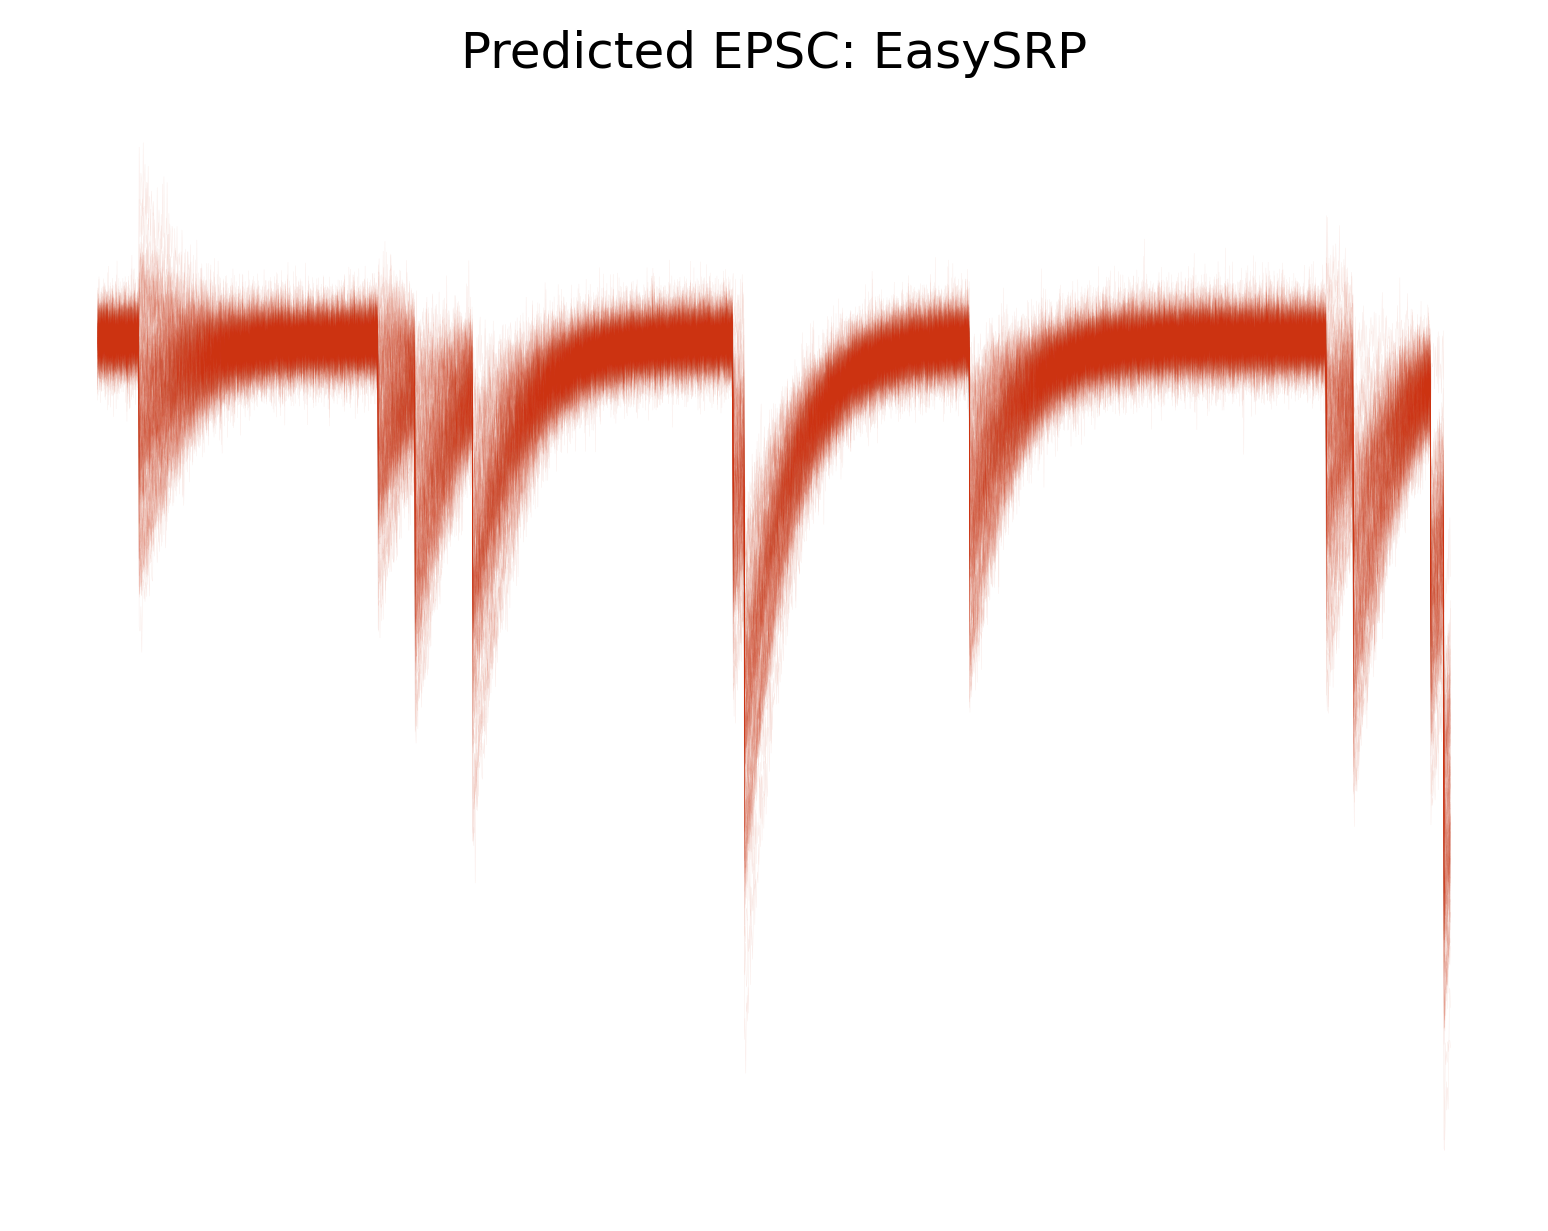

In [ ]:
plot_tmax = 15000
fig, ax = plt.subplots()
ax.plot(
        PSCs_inferred.T[:plot_tmax][::5],
        label="data",
        color="#cc3311",
        lw=0.1,
        alpha=0.1,
    )
ax.axis("off")
ax.set_title("Predicted EPSC: EasySRP")
plt.show()

**Alternate option**: repeat the steps above with the ExpSRP model for comparison.

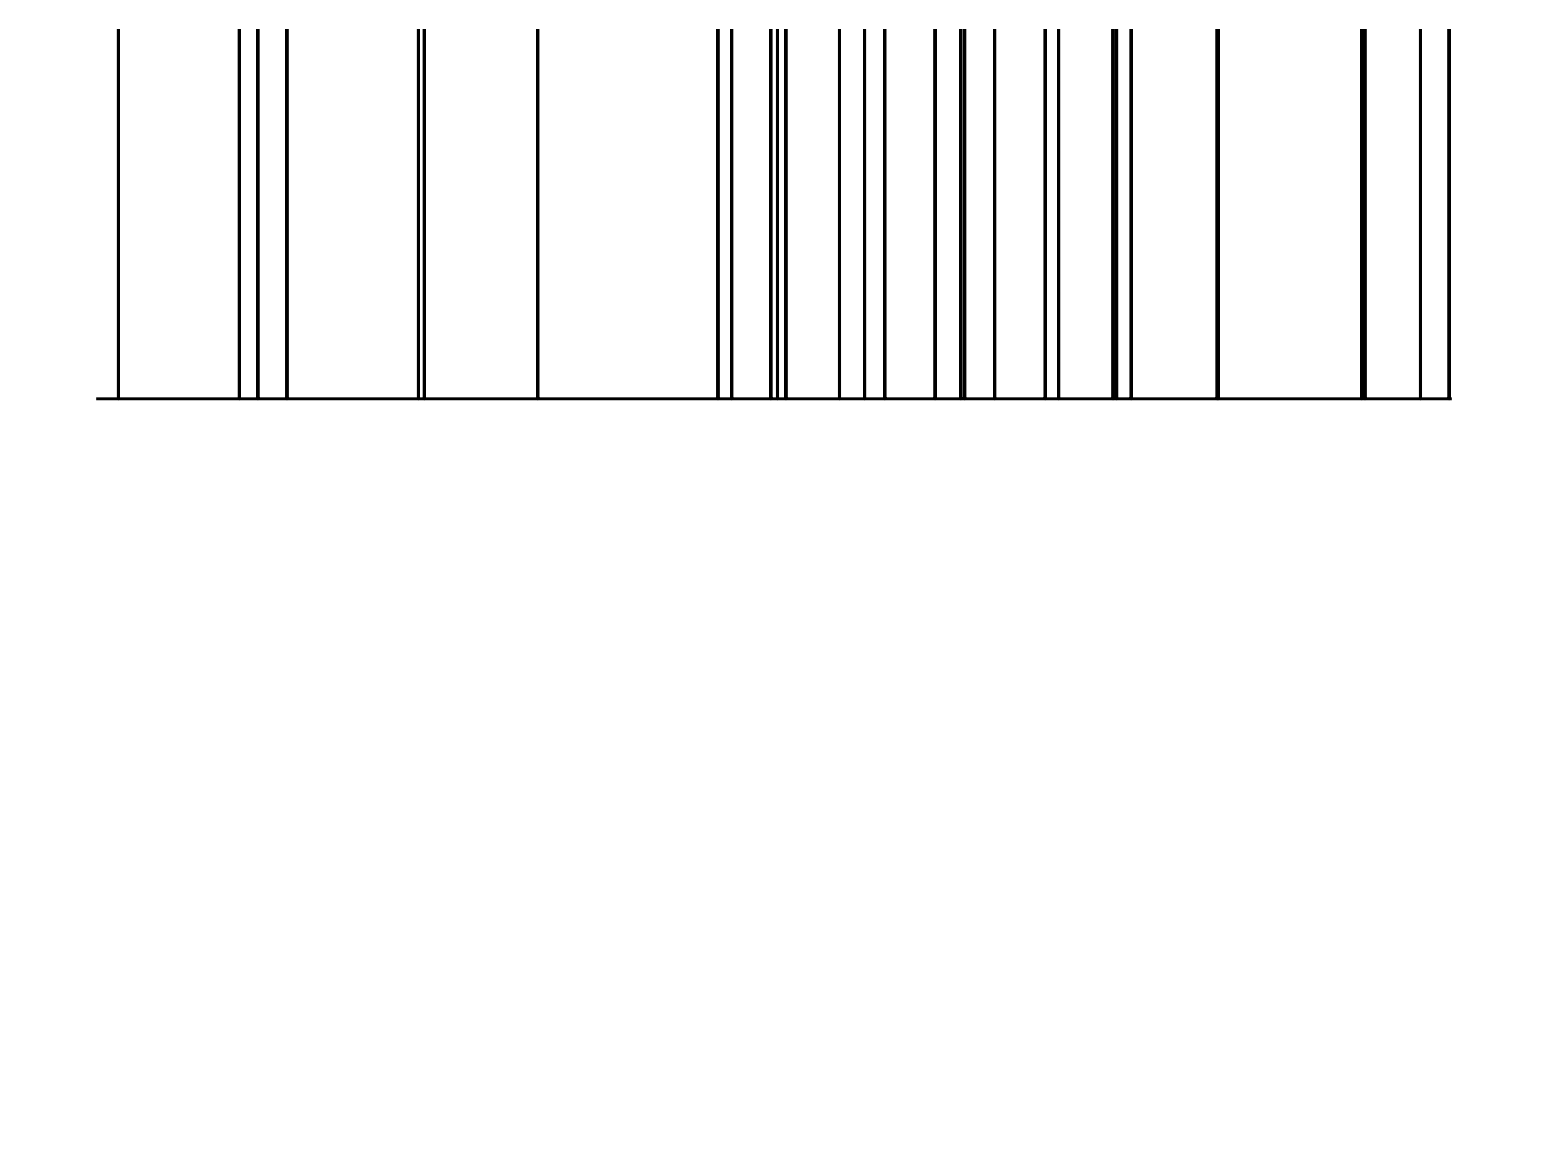

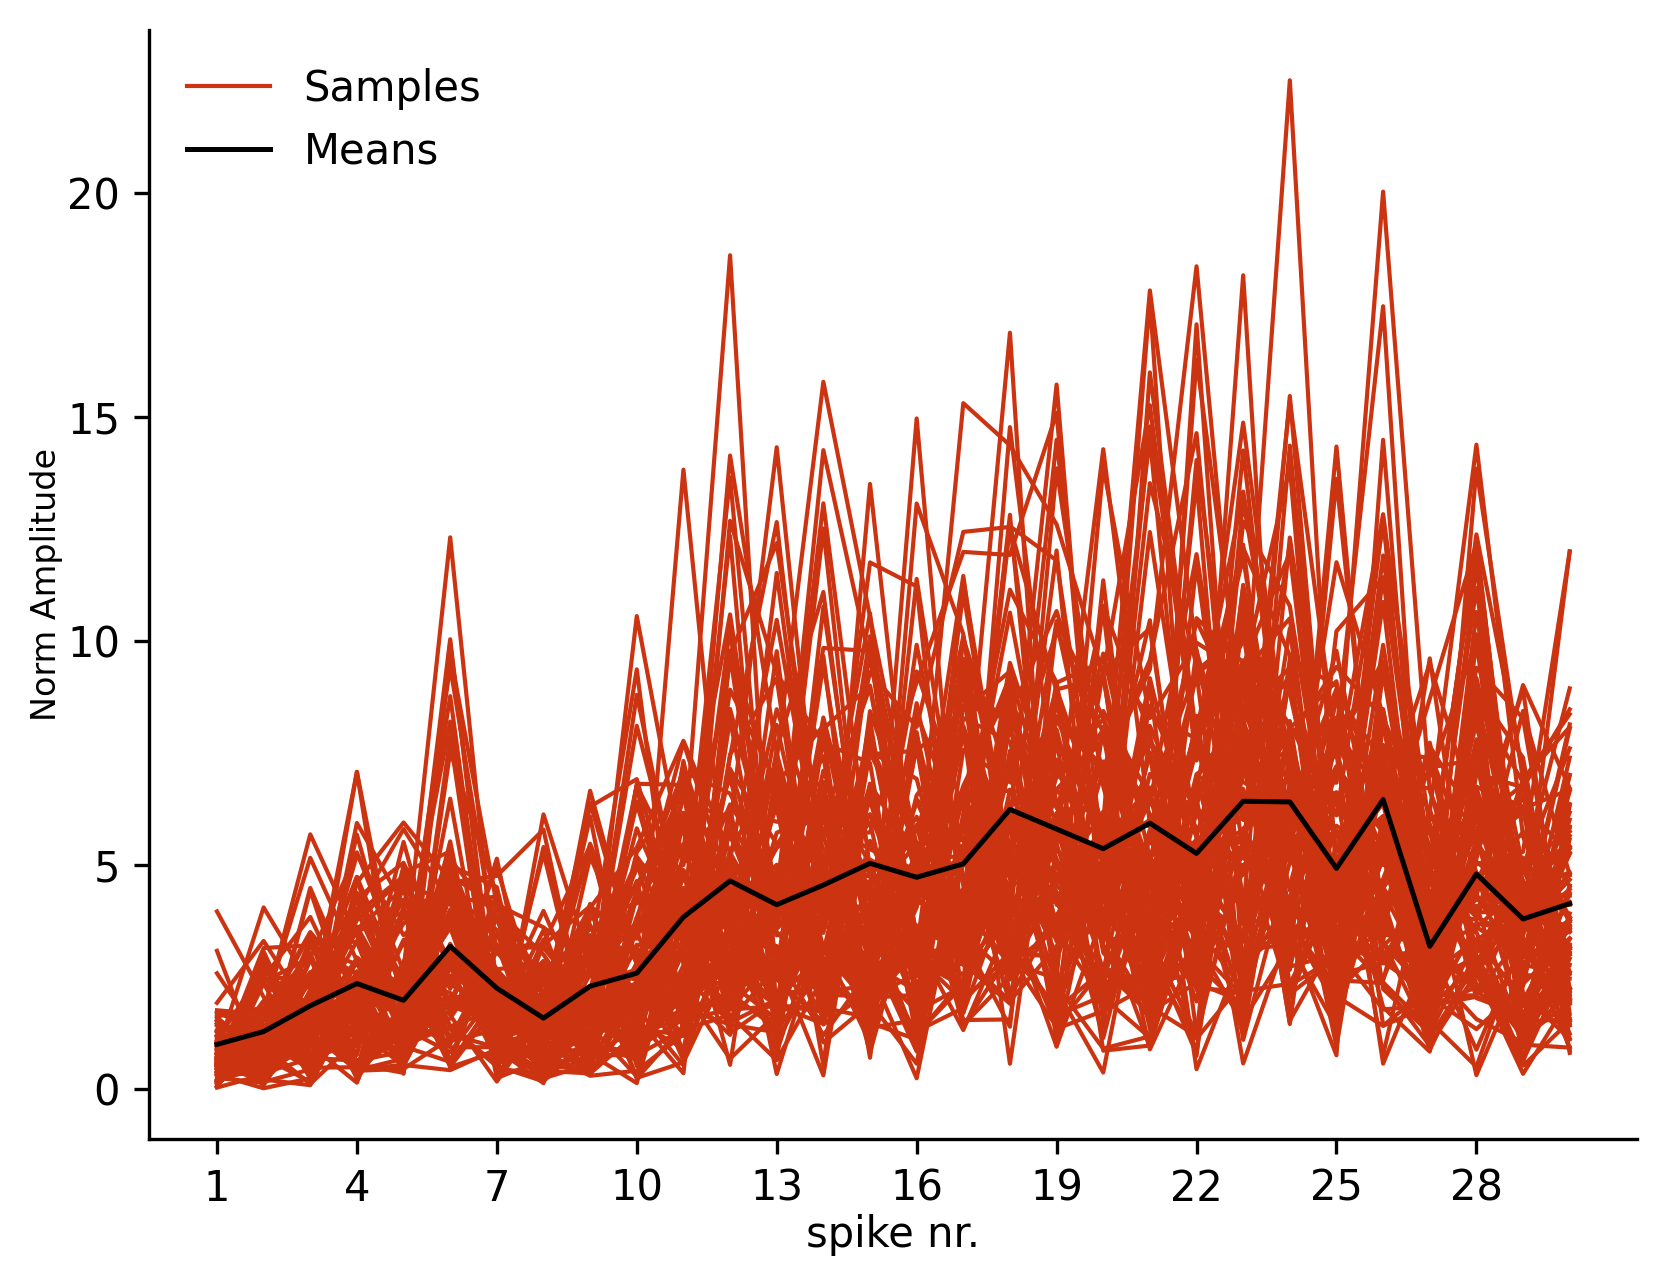

In [ ]:
#import model
from srplasticity.srp import ExpSRP

#load the fitted ExpSRP model from earlier
with open('./ExpSRP_params.p', 'rb') as file:
    exp_srp_params = pickle.load(file)

#exp_srp_params = _EasySRP_tuple_to_dict(exp_srp_params)

ExpSRP_model = ExpSRP(*exp_srp_params)
Exp_means, Exp_sigmas, Exp_efficacies = ExpSRP_model.run_ISIvec(isi_vec, ntrials=100)
fig1, axis1 = plt.subplots()
plot_spike_train(axis1, spike_train)

# Estimated peak responses to novel stimuli
fig2, axis2 = plt.subplots()
plot_estimates(axis2, Exp_means, Exp_efficacies)


In [ ]:
Exp_means, Exp_SD, Exp_efficacies, Exp_efficacytrains = ExpSRP_model.run_spiketrain(
    spike_train, ntrials=100
)

# Inferred PSCs
Exp_PSCs_inferred = np.vstack(
    [_convolve_spiketrain_with_kernel(x, PSCkernel) for x in Exp_efficacytrains]
)
#optionally add small Gaussian noise to simulate recording noise
Exp_PSCs_inferred += 0.05 * np.random.randn(Exp_PSCs_inferred.size).reshape(Exp_PSCs_inferred.shape)

[[-0.01092391 -0.02746283  0.00927895 ... -0.00596503 -0.07000347
   0.00902001]
 [ 0.00951677  0.00307661  0.04412414 ...  0.0465234   0.00945182
  -0.04529259]
 [ 0.02600774  0.00654769  0.03199539 ...  0.05487212 -0.03770666
  -0.02839788]
 ...
 [-1.04755551 -1.16115013 -1.01529882 ... -1.13056799 -1.43407223
  -1.15110403]
 [-0.9654633  -1.13046235 -1.08216782 ... -1.2509858  -1.48886892
  -1.12026682]
 [-1.03718207 -1.28164337 -1.02434205 ... -1.12707355 -1.44433357
  -1.05831338]]


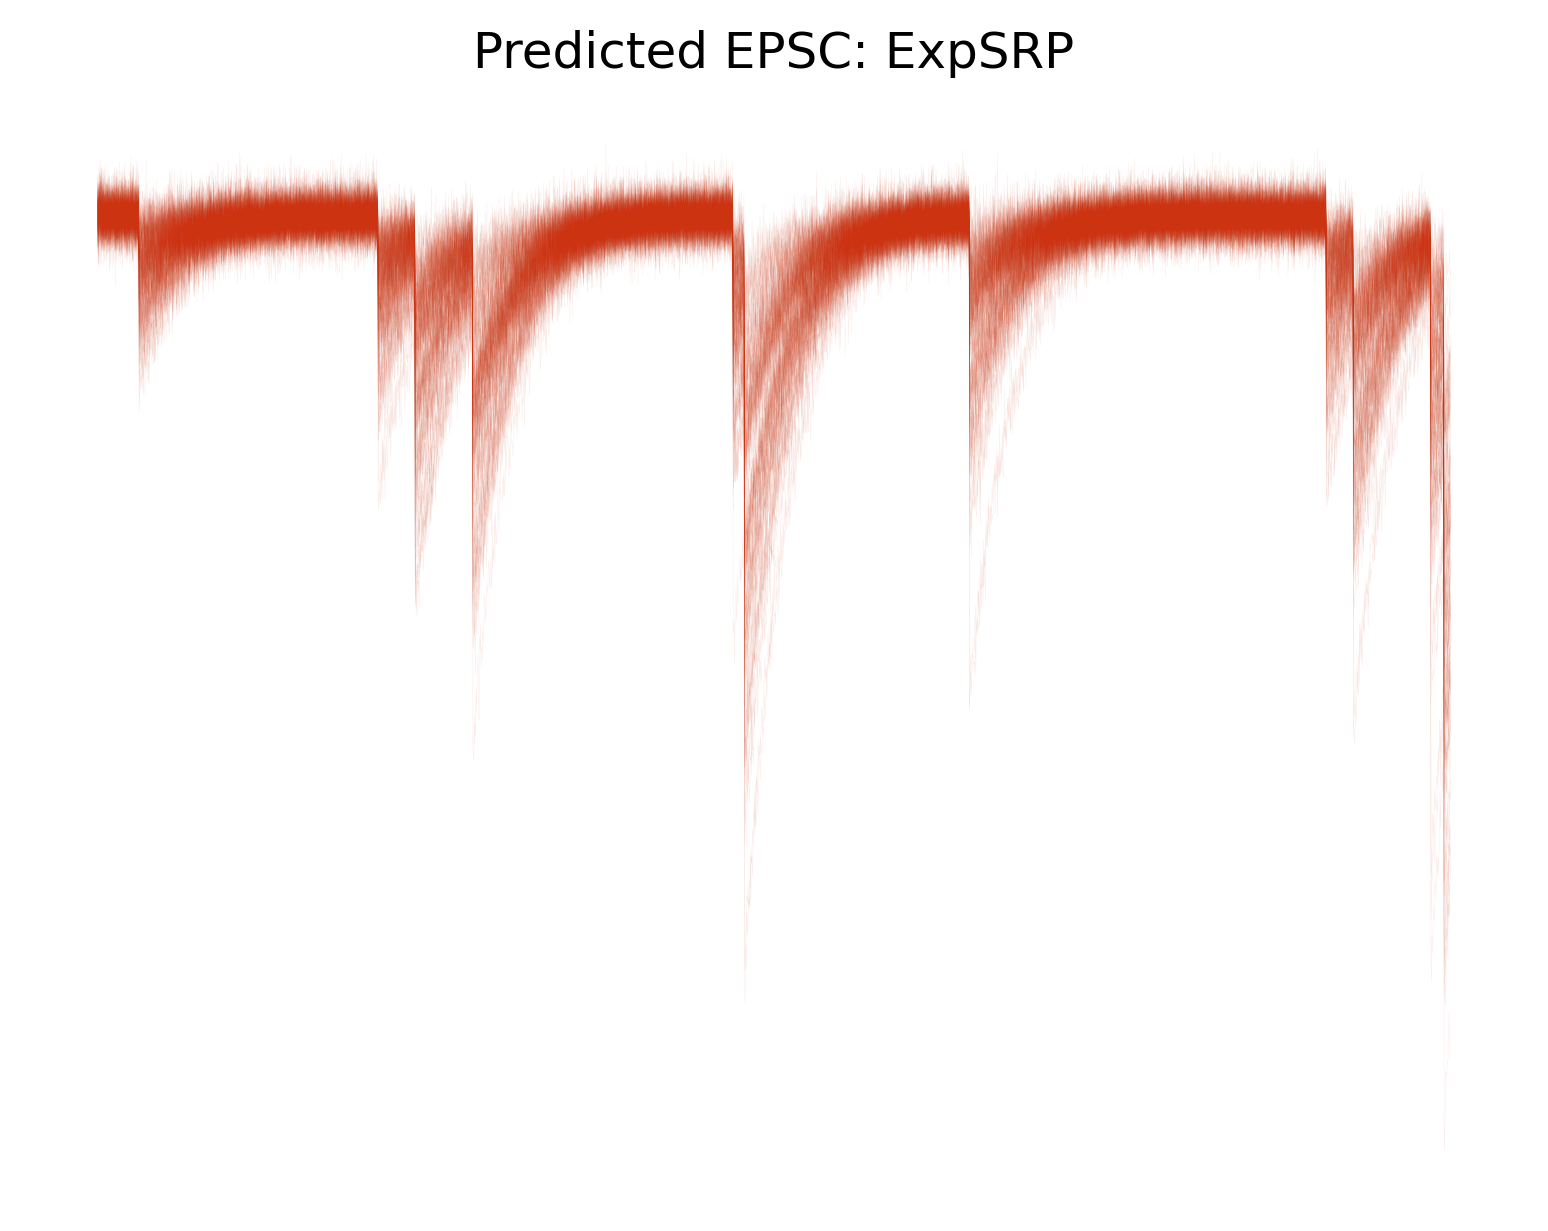

In [ ]:
plot_tmax = 15000
fig, ax = plt.subplots()
print(PSCs_inferred.T[:plot_tmax][::5])
ax.plot(
        Exp_PSCs_inferred.T[:plot_tmax][::5],
        label="data",
        color="#cc3311",
        lw=0.1,
        alpha=0.1,
    )
ax.axis("off")
ax.set_title("Predicted EPSC: ExpSRP")
plt.show()

# Data Visualization and Clustering
It is possible to use the parameters of the fitted SRP model to infer the relative degree of functional difference or similarity between different synapses. Here the user is shown how to generate one possible two-dimensional visualization of STP from these parameters.

45. For illustrative purposes we will use randomly generated SRP parameters to demonstrate visualization and clustering. Define the following function:

In [ ]:
def gen_uniform_srp(param_bounds, num_fits):
    fitted_models = [[] for i in range(0, num_fits)]
    for i in range(0, num_fits):
        for j in range(0, len(param_bounds)):
            param=np.random.default_rng().uniform(
                  low=param_bounds[j][0],    high=param_bounds[j][1])
            fitted_models[i].append(param)
    return np.asarray(fitted_models)

46. Now define SRP bounds to illustrate a case with a population of traditionally facilitating synapses, another population of traditionally depressing synapses, and a third possible ambiguous “transition” population.

In [ ]:
#classically depressing
rand_bounds1 = [
    (4, 6),  # mu baseline
    *[(-150, 0), (-1000, 0), (-3000, 0)], #mu amplitude bounds
    (0, 3) #SD range
]
#Classically facilitating
rand_bounds2 = [
    (-6, -4),  # mu baseline
    *[(0, 150), (0, 1001), (0, 3000)], #mu amplitude bounds
    (0, 3) #SD range
]
#generic range
rand_bounds3 = [
    (-3, 3),  # mu baseline
    *[(-50, 50), (-500, 500), (-1500, 1500)], #mu amplitude bounds
    (0, 3) #SD range
]

47. Finally, call the function for each set of bounds and merge the results into a Numpy array while recording the original identity of each randomly generated synapse in a second Numpy array:

In [ ]:
#generate random fits
rand_params1 = gen_uniform_srp(rand_bounds1, 30)
rand_params2 = gen_uniform_srp(rand_bounds2, 30)
rand_params3 = gen_uniform_srp(rand_bounds3, 30)

#labels
rand_labels1 = np.asarray([1 for i in range(0, 30)])
rand_labels2 = np.asarray([2 for i in range(0, 30)])
rand_labels3 = np.asarray([3 for i in range(0, 30)])

#merge into one array
all_params = np.concatenate((rand_params1, rand_params2, rand_params3))
all_labels = np.concatenate((rand_labels1, rand_labels2, rand_labels3))

48. Ensure you have imported the following packages:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

49. Use principal component analysis as implemented by the Scikit-learn package to reduce the model parameters to essential features that best capture the greatest linearly explainable variation in the data.

In [ ]:
pca = PCA(whiten=True)
scaler = StandardScaler()
scaler.fit(all_params)
scaled_arr = scaler.transform(all_params)
pca_result = pca.fit_transform(scaled_arr) #scaled

**Optional:** You can now conveniently use a clustering algorithm from Scikit-learn to infer similar groupings in your data. To configure the K-Means algorithm for this purpose run the following code:

In [ ]:
km = KMeans(n_clusters = 3)

**Optional:** Now gather inferred group labels from KMeans using the two most explanatory features from PCA

In [ ]:
cluster_labels = km.fit_predict(pca_result[:, 0:2])

**Optional**: Define marker shapes for plotting to indicate which group KMeans has assigned each synapse to:

In [ ]:
shapes = {-1: "D", 0: "o", 1: "^", 2: "s", 3: "*"}
colours = {-1:"xkcd:dark blue", 0: "xkcd:red orange", 1: "xkcd:golden yellow", 2: "xkcd:tan", 3: "xkcd:light grey"}

 50. Finally, visualize your data by plotting them in the first two dimensions given by PCA, each point corresponds to a synapse and the guesses made by KMeans are shown in the different shapes:

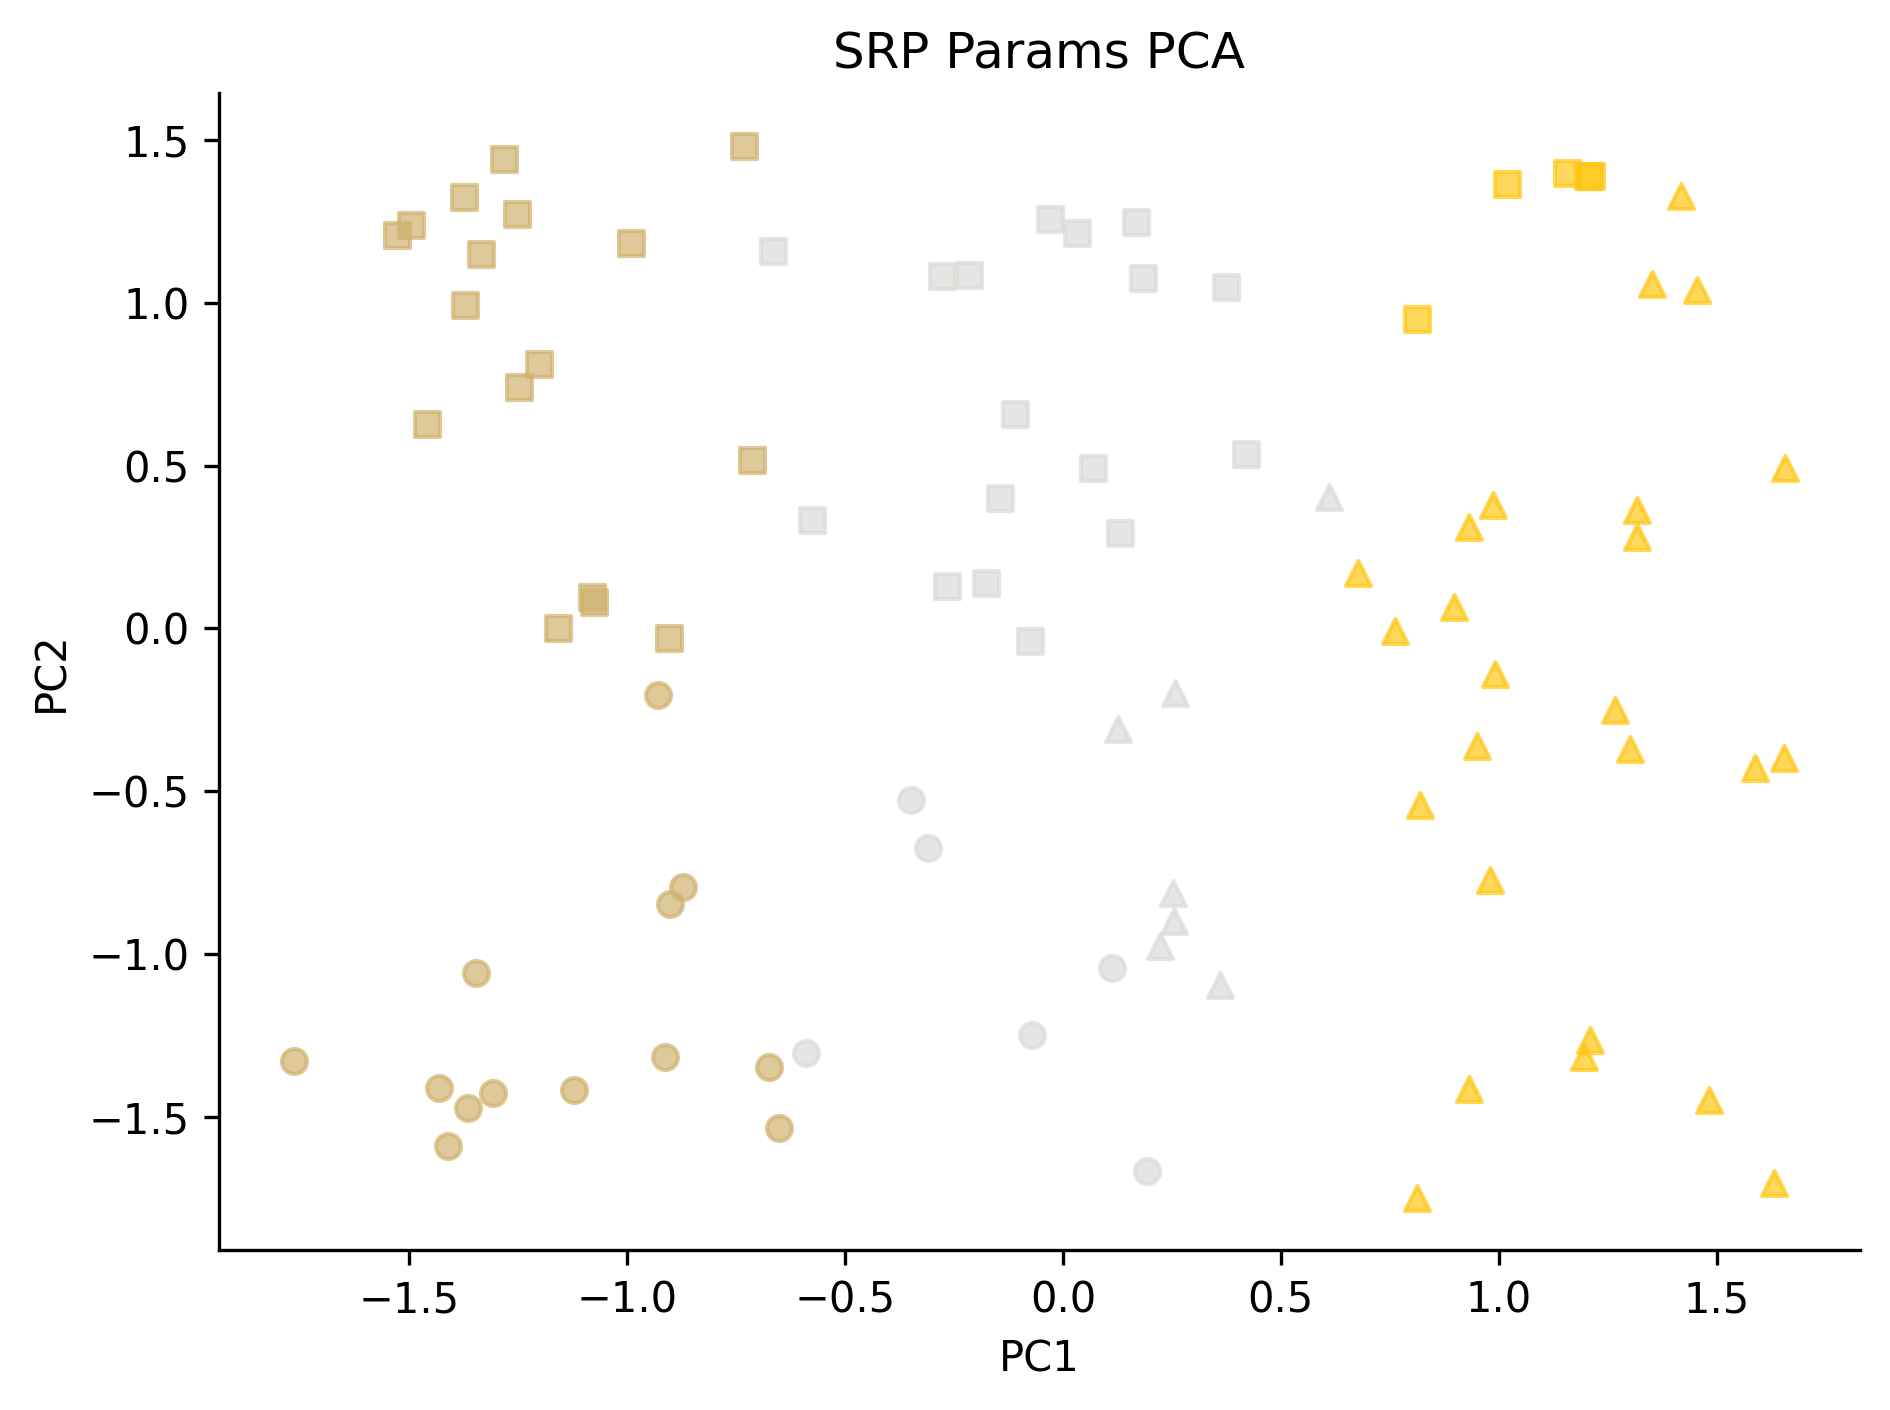

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
ax = plt.subplot(111)
for index, fit in enumerate(pca_result):
    plt.scatter(fit[0], fit[1], marker=shapes[cluster_labels[index]],
                color=colours[all_labels[index]], alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("SRP Params PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
f.tight_layout()
plt.show()

# Making Model-Based Predictions
In addition to visualization and clustering you can also use fitted SRP parameters to predict known labels for the synapses such as postsynaptic cell-type (see Beninger et al. 2024). In this case, the accuracy of the predictions can serve as a lower bound metric for the degree to which the set of labels corresponds to functionally distinct types of synapses.

52. For illustrative purposes we will once again rely on randomly generated data to demonstrate prediction. If you have not already, repeat steps 45 to 47. Alternately you can assign your data to a variable named “all_params” and assign a numpy array of the labels you wish to predict (with parameter-label pairs having the same row number in both arrays) to a variable named “all_labels”. For the random example this can be assigned to match the dandom cluster labels generated above:

In [ ]:
all_labels = cluster_labels

53. Import packages with tools for performing and managing supervised machine learning:

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

54. In order to robustly estimate predictive accuracy you will need to repeatedly fit a predictive model on one subset of your data and then test its performance on another distinct subset. First, create a list to hold the accuracy values for each of these tests.

In [ ]:
accuracies = []

55. You will also want to know how likely your model was to get a certain accuracy value by chance. Create another list to record these chance level accuracy “baselines”.

In [ ]:
baselines = []

56. You can now use the imported tools to repeatedly “train” (i.e., fit) a supervised machine learning model called a support vector machine (SVC) and a tool for inferring baseline accuracy values called “DummyClassifier”:

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
for i, (train_index, test_index) in enumerate(skf.split(pca_result, all_labels)):
    train_data, train_targets = pca_result[train_index], all_labels[train_index]
    test_data, test_targets = pca_result[test_index], all_labels[test_index]

    clf = SVC()
    clf.fit(train_data, train_targets)
    accuracy = clf.score(test_data, test_targets)
    accuracies.append(accuracy)

    dummy_clf = DummyClassifier(strategy='most_frequent')
    dummy_clf.fit(train_data, train_targets) #model like comparison
    baseline = dummy_clf.score(test_data, test_targets)
    baselines.append(baseline)

57. Finally, generate a box plot containing the accuracy and baseline values you have computed using the code below. If you used the random data generation method we presented you should find accuracy values that are much higher than baseline accuracy but are lower than 100% because of the ambiguous “transition” class of synapses you have generated.

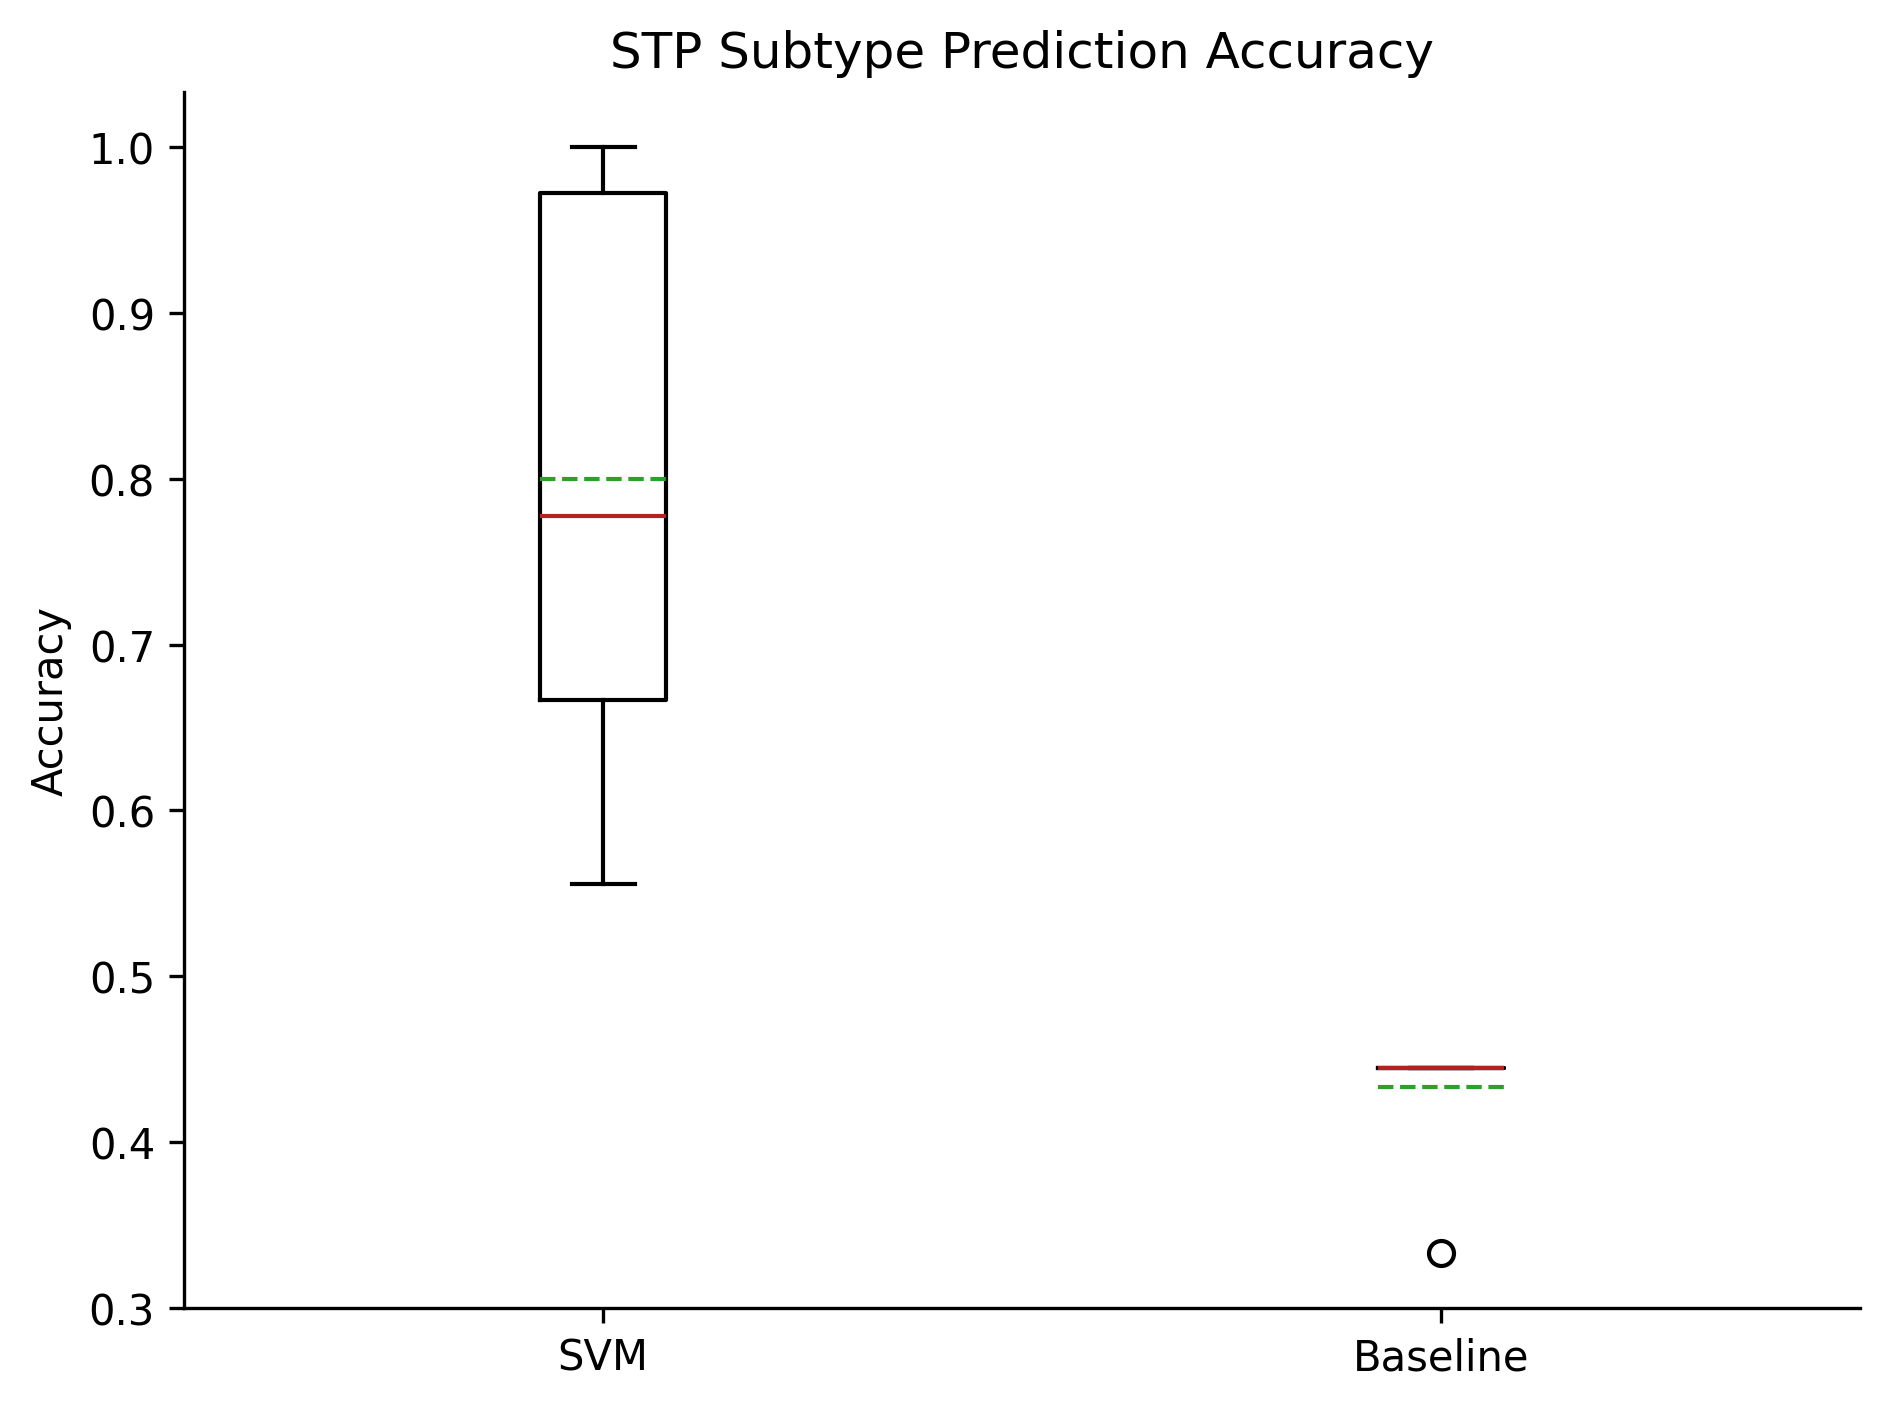

In [ ]:
#plot supervised
#plot supervised
y_vals  = [accuracies, baselines]
x_coordinates = [i for i in range(1, len(y_vals)+1)]
f = plt.figure()
ax = plt.subplot(111)
medianprops = dict(linestyle=None, color='firebrick')
plt.boxplot(y_vals, showmeans=True, meanline=True, medianprops=medianprops)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("STP Subtype Prediction Accuracy")
plt.xticks(x_coordinates, ["SVM", "Baseline"])
plt.ylabel("Accuracy")
f.tight_layout()
plt.show()